# **UAE Property Price Predictor & Demand Forecasting Model**

In [104]:
#import the librays
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [105]:
df=pd.read_csv('/content/UAE_properties.csv')

In [106]:
df

,date,City,Type,Furnishing,Area_in_sqft,Beds,Baths,Rent_category,Rent_Price
0,07-03-2024,Abu Dhabi,Apartment,Unfurnished,1785,3,4,Medium,124000
1,08-03-2024,Abu Dhabi,Apartment,Unfurnished,1422,3,4,Medium,140000
2,21-03-2024,Abu Dhabi,Apartment,Furnished,1314,2,3,Medium,99000
3,24-02-2024,Abu Dhabi,Penthouse,Unfurnished,3843,3,4,High,220000
4,16-02-2024,Abu Dhabi,Villa,Unfurnished,6860,5,7,High,350000
...,...,...,...,...,...,...,...,...,...
71728,02-04-2024,Sharjah,Apartment,Unfurnished,1400,1,2,Low,22000
71729,20-03-2024,Sharjah,Apartment,Unfurnished,1800,3,3,Low,48000
71730,20-03-2024,Sharjah,Apartment,Unfurnished,1600,2,2,Low,35000
71731,08-03-2024,Sharjah,Apartment,Unfurnished,850,1,2,Low,47000


In [107]:
# Remove rows where Rent_Price < 1
df = df[df["Rent_Price"] >= 2000].copy()

# Reset index inplace
df.reset_index(drop=True, inplace=True)

In [108]:
df.ndim

2

In [109]:
df.shape

(71715, 9)

In [110]:
df.dtypes

,0
date,object
City,object
Type,object
Furnishing,object
Area_in_sqft,int64
Beds,int64
Baths,int64
Rent_category,object
Rent_Price,int64


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71715 entries, 0 to 71714
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           71715 non-null  object
 1   City           71715 non-null  object
 2   Type           71715 non-null  object
 3   Furnishing     71715 non-null  object
 4   Area_in_sqft   71715 non-null  int64 
 5   Beds           71715 non-null  int64 
 6   Baths          71715 non-null  int64 
 7   Rent_category  71715 non-null  object
 8   Rent_Price     71715 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 4.9+ MB


In [112]:
#finding the missing value
df.isnull().sum()

,0
date,0
City,0
Type,0
Furnishing,0
Area_in_sqft,0
Beds,0
Baths,0
Rent_category,0
Rent_Price,0


In [113]:
#remove the dublicate values in place true
df.drop_duplicates(inplace=True)

In [114]:
df

,date,City,Type,Furnishing,Area_in_sqft,Beds,Baths,Rent_category,Rent_Price
0,07-03-2024,Abu Dhabi,Apartment,Unfurnished,1785,3,4,Medium,124000
1,08-03-2024,Abu Dhabi,Apartment,Unfurnished,1422,3,4,Medium,140000
2,21-03-2024,Abu Dhabi,Apartment,Furnished,1314,2,3,Medium,99000
3,24-02-2024,Abu Dhabi,Penthouse,Unfurnished,3843,3,4,High,220000
4,16-02-2024,Abu Dhabi,Villa,Unfurnished,6860,5,7,High,350000
...,...,...,...,...,...,...,...,...,...
71710,02-04-2024,Sharjah,Apartment,Unfurnished,1400,1,2,Low,22000
71711,20-03-2024,Sharjah,Apartment,Unfurnished,1800,3,3,Low,48000
71712,20-03-2024,Sharjah,Apartment,Unfurnished,1600,2,2,Low,35000
71713,08-03-2024,Sharjah,Apartment,Unfurnished,850,1,2,Low,47000


In [115]:
# List of categorical columns
categorical_cols = ['City', 'Type', 'Furnishing', 'Rent_category']

# Show unique values for each categorical column
for col in categorical_cols:
    print(f"\nUnique values in {col}:")
    print(df[col].unique())
    print(f"Count of unique values: {df[col].nunique()}")


Unique values in City:
['Abu Dhabi' 'Ajman' 'Dubai' 'Sharjah']
Count of unique values: 4

Unique values in Type:
['Apartment' 'Penthouse' 'Villa' 'Townhouse']
Count of unique values: 4

Unique values in Furnishing:
['Unfurnished' 'Furnished']
Count of unique values: 2

Unique values in Rent_category:
['Medium' 'High' 'Low']
Count of unique values: 3


In [116]:
# Convert with correct format (day first)
df['date'] = pd.to_datetime(df['date'], dayfirst=True, errors='coerce')

In [117]:
# Extract year, month, day
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [118]:
# Create year-month column
df['year_month'] = df['date'].dt.to_period('M').astype(str)

In [119]:
df

,date,City,Type,Furnishing,Area_in_sqft,Beds,Baths,Rent_category,Rent_Price,year,month,day,year_month
0,2024-03-07,Abu Dhabi,Apartment,Unfurnished,1785,3,4,Medium,124000,2024,3,7,2024-03
1,2024-03-08,Abu Dhabi,Apartment,Unfurnished,1422,3,4,Medium,140000,2024,3,8,2024-03
2,2024-03-21,Abu Dhabi,Apartment,Furnished,1314,2,3,Medium,99000,2024,3,21,2024-03
3,2024-02-24,Abu Dhabi,Penthouse,Unfurnished,3843,3,4,High,220000,2024,2,24,2024-02
4,2024-02-16,Abu Dhabi,Villa,Unfurnished,6860,5,7,High,350000,2024,2,16,2024-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71710,2024-04-02,Sharjah,Apartment,Unfurnished,1400,1,2,Low,22000,2024,4,2,2024-04
71711,2024-03-20,Sharjah,Apartment,Unfurnished,1800,3,3,Low,48000,2024,3,20,2024-03
71712,2024-03-20,Sharjah,Apartment,Unfurnished,1600,2,2,Low,35000,2024,3,20,2024-03
71713,2024-03-08,Sharjah,Apartment,Unfurnished,850,1,2,Low,47000,2024,3,8,2024-03


In [120]:
df["year"].unique()

array([2024, 2023, 2022, 2020, 2021, 2019, 2018], dtype=int32)

In [121]:
#*********

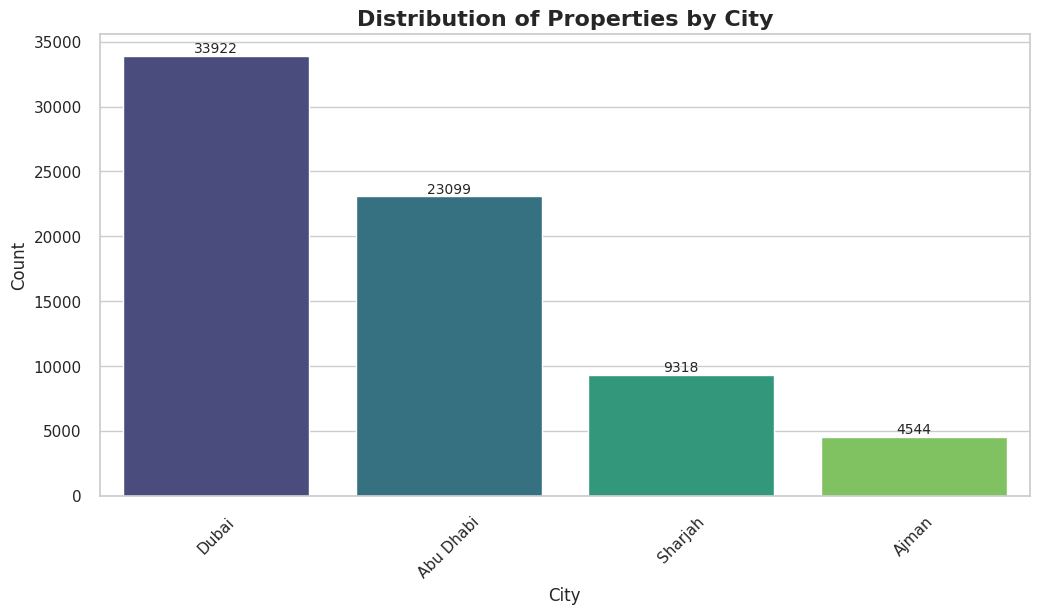

In [122]:
# Set style for beautiful plots
sns.set(style="whitegrid", palette="muted")

# --- 1. City ---
plt.figure(figsize=(12,6))
ax = sns.countplot(data=df, x="City", order=df['City'].value_counts().index, palette="viridis")
plt.title("Distribution of Properties by City", fontsize=16, weight='bold')
plt.xticks(rotation=45)
plt.xlabel("City")
plt.ylabel("Count")
# Add count labels
for container in ax.containers:
    ax.bar_label(container, fontsize=10)
plt.show()

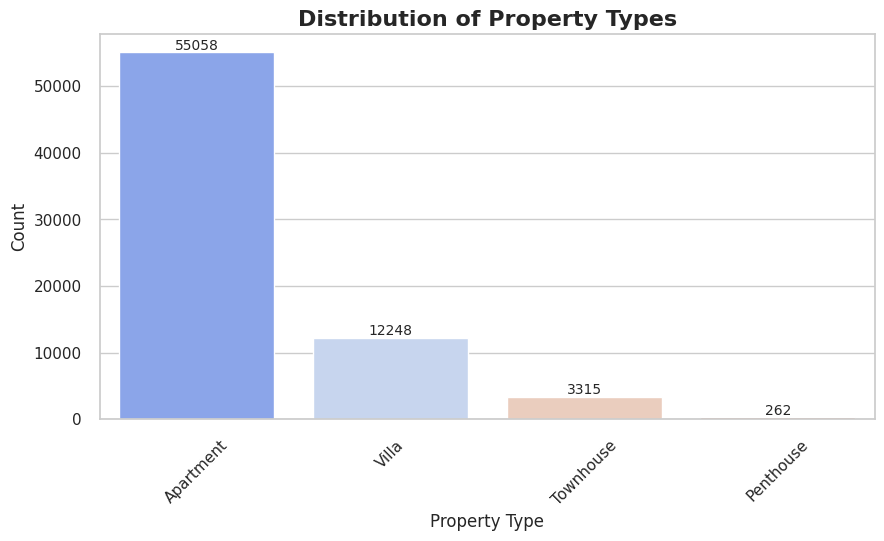

In [123]:
# --- 2. Type ---
plt.figure(figsize=(10,5))
ax = sns.countplot(data=df, x="Type", order=df['Type'].value_counts().index, palette="coolwarm")
plt.title("Distribution of Property Types", fontsize=16, weight='bold')
plt.xticks(rotation=45)
plt.xlabel("Property Type")
plt.ylabel("Count")
for container in ax.containers:
    ax.bar_label(container, fontsize=10)
plt.show()

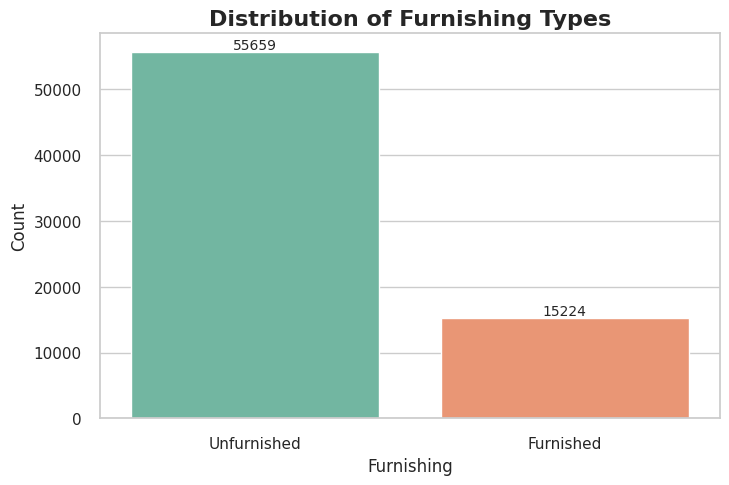

In [124]:
# --- 3. Furnishing ---
plt.figure(figsize=(8,5))
ax = sns.countplot(data=df, x="Furnishing", order=df['Furnishing'].value_counts().index, palette="Set2")
plt.title("Distribution of Furnishing Types", fontsize=16, weight='bold')
plt.xticks(rotation=0)
plt.xlabel("Furnishing")
plt.ylabel("Count")
for container in ax.containers:
    ax.bar_label(container, fontsize=10)
plt.show()

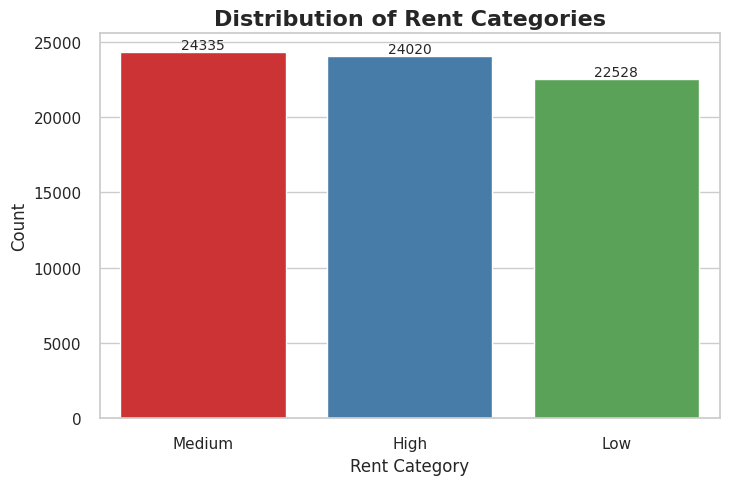

In [125]:
# --- 4. Rent Category ---
plt.figure(figsize=(8,5))
ax = sns.countplot(data=df, x="Rent_category", order=df['Rent_category'].value_counts().index, palette="Set1")
plt.title("Distribution of Rent Categories", fontsize=16, weight='bold')
plt.xticks(rotation=0)
plt.xlabel("Rent Category")
plt.ylabel("Count")
for container in ax.containers:
    ax.bar_label(container, fontsize=10)
plt.show()

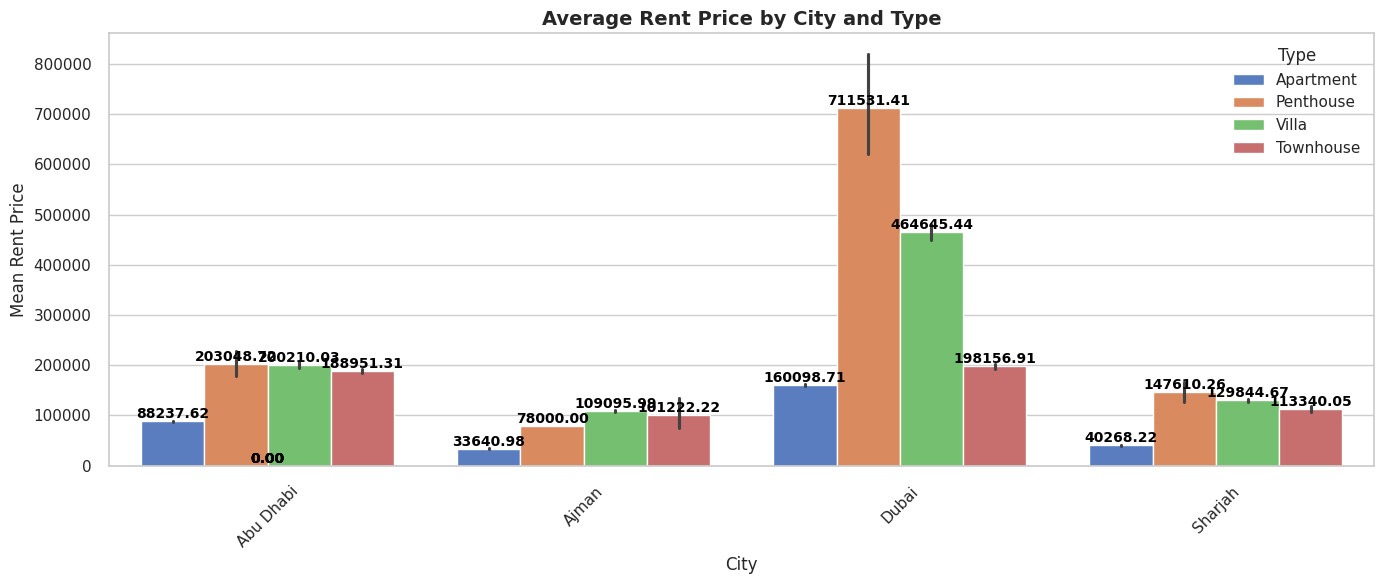

In [126]:
# --- First Graph: Rent_Price vs City, colored by Type ---
plt.figure(figsize=(14,6))
ax1 = sns.barplot(data=df, x='City', y='Rent_Price', hue='Type')
plt.title('Average Rent Price by City and Type', fontsize=14, fontweight='bold')
plt.ylabel('Mean Rent Price')
plt.xlabel('City')
plt.xticks(rotation=45)

# Add values on top
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.2f}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

plt.tight_layout()
plt.show()

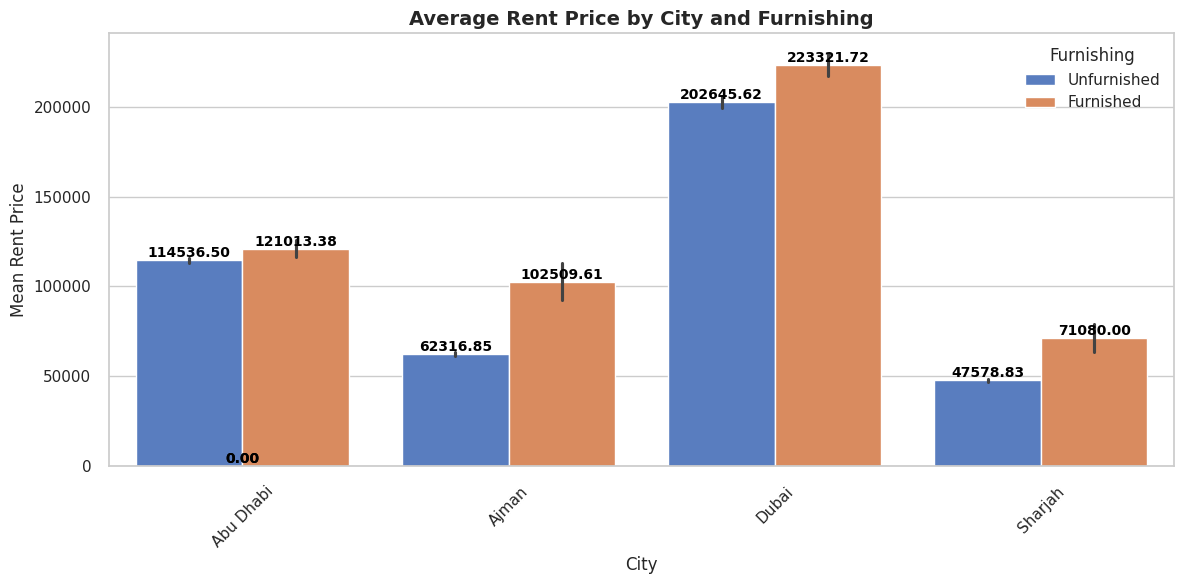

In [127]:
# --- Second Graph: Rent_Price vs City, colored by Furnishing ---
plt.figure(figsize=(12,6))
ax2 = sns.barplot(data=df, x='City', y='Rent_Price', hue='Furnishing')
plt.title('Average Rent Price by City and Furnishing', fontsize=14, fontweight='bold')
plt.ylabel('Mean Rent Price')
plt.xlabel('City')
plt.xticks(rotation=45)

# Add values on top
for p in ax2.patches:
    ax2.annotate(f'{p.get_height():.2f}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

plt.tight_layout()
plt.show()


In [128]:
df

,date,City,Type,Furnishing,Area_in_sqft,Beds,Baths,Rent_category,Rent_Price,year,month,day,year_month
0,2024-03-07,Abu Dhabi,Apartment,Unfurnished,1785,3,4,Medium,124000,2024,3,7,2024-03
1,2024-03-08,Abu Dhabi,Apartment,Unfurnished,1422,3,4,Medium,140000,2024,3,8,2024-03
2,2024-03-21,Abu Dhabi,Apartment,Furnished,1314,2,3,Medium,99000,2024,3,21,2024-03
3,2024-02-24,Abu Dhabi,Penthouse,Unfurnished,3843,3,4,High,220000,2024,2,24,2024-02
4,2024-02-16,Abu Dhabi,Villa,Unfurnished,6860,5,7,High,350000,2024,2,16,2024-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71710,2024-04-02,Sharjah,Apartment,Unfurnished,1400,1,2,Low,22000,2024,4,2,2024-04
71711,2024-03-20,Sharjah,Apartment,Unfurnished,1800,3,3,Low,48000,2024,3,20,2024-03
71712,2024-03-20,Sharjah,Apartment,Unfurnished,1600,2,2,Low,35000,2024,3,20,2024-03
71713,2024-03-08,Sharjah,Apartment,Unfurnished,850,1,2,Low,47000,2024,3,8,2024-03


# **Problem Statement**


*   In the UAE real estate market, rental prices vary widely depending on property characteristics such as location, size, number of bedrooms and bathrooms, property type, furnishing status, and market category. Accurate rental price estimation is crucial for tenants, landlords, and real estate agencies to make informed decisions and reduce pricing discrepancies. This study focuses on predicting rental prices using the 2024 property data, leveraging property features to develop a reliable and interpretable model for rent estimation.



# **Justification:**


*  We are choosing 2024 data because it represents the most recent and relevant snapshot of the Dubai rental market. Market conditions, economic factors, and property trends can change rapidly, making older data less indicative of current pricing patterns. Analyzing 2024 ensures that our predictions reflect current market realities and provide actionable insights for stakeholders. Additionally, using a single year simplifies data preprocessing and model building while allowing for accurate evaluation. Accurate price prediction not only helps tenants and landlords negotiate fair prices but also enables real estate platforms to provide data-driven rental estimates, assisting in market transparency and competitive strategy. By identifying the most influential property features, this study will highlight key determinants of rent in UAE.

In [129]:
# Keep only 2024 data
df_2024 = df[df['date'].dt.year == 2024].copy()

In [130]:
df_2024

,date,City,Type,Furnishing,Area_in_sqft,Beds,Baths,Rent_category,Rent_Price,year,month,day,year_month
0,2024-03-07,Abu Dhabi,Apartment,Unfurnished,1785,3,4,Medium,124000,2024,3,7,2024-03
1,2024-03-08,Abu Dhabi,Apartment,Unfurnished,1422,3,4,Medium,140000,2024,3,8,2024-03
2,2024-03-21,Abu Dhabi,Apartment,Furnished,1314,2,3,Medium,99000,2024,3,21,2024-03
3,2024-02-24,Abu Dhabi,Penthouse,Unfurnished,3843,3,4,High,220000,2024,2,24,2024-02
4,2024-02-16,Abu Dhabi,Villa,Unfurnished,6860,5,7,High,350000,2024,2,16,2024-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71710,2024-04-02,Sharjah,Apartment,Unfurnished,1400,1,2,Low,22000,2024,4,2,2024-04
71711,2024-03-20,Sharjah,Apartment,Unfurnished,1800,3,3,Low,48000,2024,3,20,2024-03
71712,2024-03-20,Sharjah,Apartment,Unfurnished,1600,2,2,Low,35000,2024,3,20,2024-03
71713,2024-03-08,Sharjah,Apartment,Unfurnished,850,1,2,Low,47000,2024,3,8,2024-03


In [131]:
#reset in index
df_2024.reset_index(drop=True, inplace=True)

In [132]:
df_2024

,date,City,Type,Furnishing,Area_in_sqft,Beds,Baths,Rent_category,Rent_Price,year,month,day,year_month
0,2024-03-07,Abu Dhabi,Apartment,Unfurnished,1785,3,4,Medium,124000,2024,3,7,2024-03
1,2024-03-08,Abu Dhabi,Apartment,Unfurnished,1422,3,4,Medium,140000,2024,3,8,2024-03
2,2024-03-21,Abu Dhabi,Apartment,Furnished,1314,2,3,Medium,99000,2024,3,21,2024-03
3,2024-02-24,Abu Dhabi,Penthouse,Unfurnished,3843,3,4,High,220000,2024,2,24,2024-02
4,2024-02-16,Abu Dhabi,Villa,Unfurnished,6860,5,7,High,350000,2024,2,16,2024-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57201,2024-04-02,Sharjah,Apartment,Unfurnished,1400,1,2,Low,22000,2024,4,2,2024-04
57202,2024-03-20,Sharjah,Apartment,Unfurnished,1800,3,3,Low,48000,2024,3,20,2024-03
57203,2024-03-20,Sharjah,Apartment,Unfurnished,1600,2,2,Low,35000,2024,3,20,2024-03
57204,2024-03-08,Sharjah,Apartment,Unfurnished,850,1,2,Low,47000,2024,3,8,2024-03


In [133]:
# Drop unnecessary columns that won't be used as features for price prediction
df_2024 = df_2024.drop(columns=['date','year','month','day','year_month'])

In [134]:
df_2024

,City,Type,Furnishing,Area_in_sqft,Beds,Baths,Rent_category,Rent_Price
0,Abu Dhabi,Apartment,Unfurnished,1785,3,4,Medium,124000
1,Abu Dhabi,Apartment,Unfurnished,1422,3,4,Medium,140000
2,Abu Dhabi,Apartment,Furnished,1314,2,3,Medium,99000
3,Abu Dhabi,Penthouse,Unfurnished,3843,3,4,High,220000
4,Abu Dhabi,Villa,Unfurnished,6860,5,7,High,350000
...,...,...,...,...,...,...,...,...
57201,Sharjah,Apartment,Unfurnished,1400,1,2,Low,22000
57202,Sharjah,Apartment,Unfurnished,1800,3,3,Low,48000
57203,Sharjah,Apartment,Unfurnished,1600,2,2,Low,35000
57204,Sharjah,Apartment,Unfurnished,850,1,2,Low,47000


In [135]:
# List of categorical columns
categorical_cols = ['Type', 'Furnishing', 'Rent_category']

# Show unique values for each categorical column
for col in categorical_cols:
    print(f"\nUnique values in '{col}':")
    print(df_2024[col].unique())
    print(f"Number of unique values: {df_2024[col].nunique()}")



Unique values in 'Type':
['Apartment' 'Penthouse' 'Villa' 'Townhouse']
Number of unique values: 4

Unique values in 'Furnishing':
['Unfurnished' 'Furnished']
Number of unique values: 2

Unique values in 'Rent_category':
['Medium' 'High' 'Low']
Number of unique values: 3


In [136]:
#discribe
df_2024.describe()

,Area_in_sqft,Beds,Baths,Rent_Price
count,57206.000000,57206.000000,57206.000000,5.720600e+04
mean,2003.964007,2.112558,2.587106,1.482887e+05
std,2839.330294,1.550435,1.571118,2.298928e+05
min,74.000000,0.000000,1.000000,7.500000e+03
25%,830.000000,1.000000,2.000000,5.500000e+04
50%,1300.000000,2.000000,2.000000,1.000000e+05
75%,2050.000000,3.000000,3.000000,1.700000e+05
max,210254.000000,11.000000,11.000000,1.600000e+07


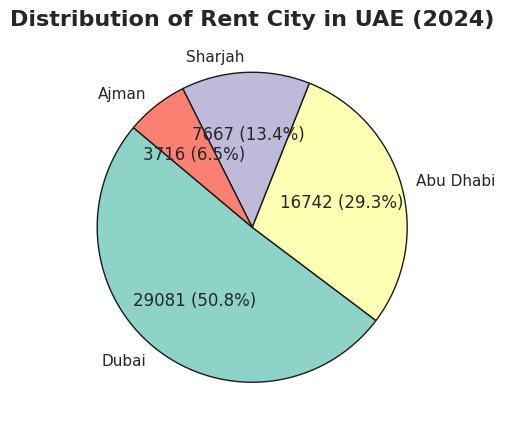

In [137]:
# Data for City
rent_counts = df_2024['City'].value_counts()
rent_labels = rent_counts.index
rent_sizes = rent_counts.values

# Plot pie chart
plt.figure(figsize=(5,7))
plt.pie(rent_sizes, labels=rent_labels, autopct=lambda p: '{:.0f} ({:.1f}%)'.format(p*sum(rent_sizes)/100, p),
        startangle=140, colors=plt.cm.Set3.colors, wedgeprops={'edgecolor':'k'})
plt.title("Distribution of Rent City in UAE (2024)", fontsize=16, weight='bold')
plt.show()

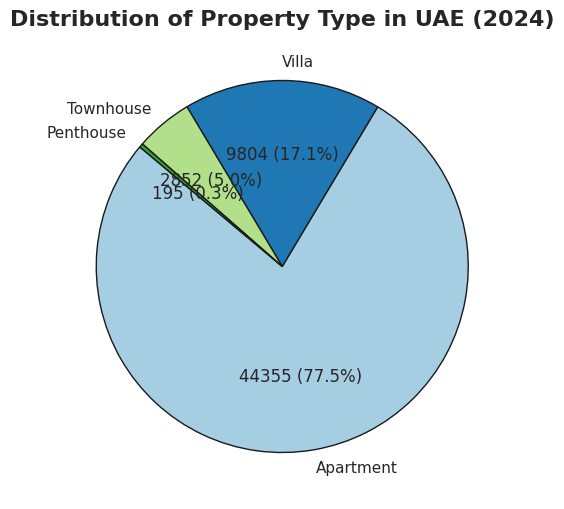

In [138]:
# Data for Type
type_counts = df_2024['Type'].value_counts()
type_labels = type_counts.index
type_sizes = type_counts.values

# Plot pie chart
plt.figure(figsize=(6,8))
plt.pie(type_sizes, labels=type_labels, autopct=lambda p: '{:.0f} ({:.1f}%)'.format(p*sum(type_sizes)/100, p),
        startangle=140, colors=plt.cm.Paired.colors, wedgeprops={'edgecolor':'k'})
plt.title("Distribution of Property Type in UAE (2024)", fontsize=16, weight='bold')
plt.show()

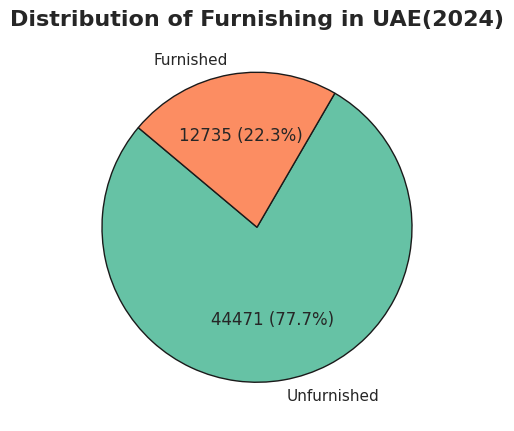

In [139]:
# Data for Furnishing
furn_counts = df_2024['Furnishing'].value_counts()
furn_labels = furn_counts.index
furn_sizes = furn_counts.values

# Plot pie chart
plt.figure(figsize=(5,7))
plt.pie(furn_sizes, labels=furn_labels, autopct=lambda p: '{:.0f} ({:.1f}%)'.format(p*sum(furn_sizes)/100, p),
        startangle=140, colors=plt.cm.Set2.colors, wedgeprops={'edgecolor':'k'})
plt.title("Distribution of Furnishing in UAE(2024)", fontsize=16, weight='bold')
plt.show()


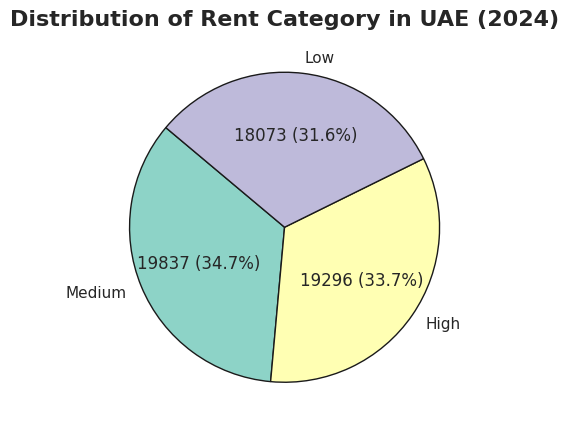

In [140]:
# Data for Rent_category
rent_counts = df_2024['Rent_category'].value_counts()
rent_labels = rent_counts.index
rent_sizes = rent_counts.values

# Plot pie chart
plt.figure(figsize=(5,7))
plt.pie(rent_sizes, labels=rent_labels, autopct=lambda p: '{:.0f} ({:.1f}%)'.format(p*sum(rent_sizes)/100, p),
        startangle=140, colors=plt.cm.Set3.colors, wedgeprops={'edgecolor':'k'})
plt.title("Distribution of Rent Category in UAE (2024)", fontsize=16, weight='bold')
plt.show()


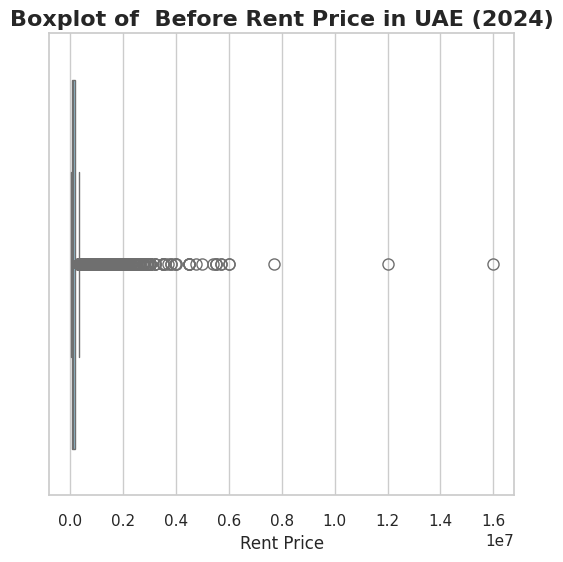

In [141]:
# Set style for beautiful plots
sns.set(style="whitegrid")

# --- 1. Boxplot for Rent_Price ---
plt.figure(figsize=(6,6))
sns.boxplot(x=df_2024['Rent_Price'], color='skyblue', fliersize=8)
plt.title("Boxplot of  Before Rent Price in UAE (2024)", fontsize=16, weight='bold')
plt.xlabel("Rent Price")
plt.show()

In [142]:
# Step 1: Sort Rent_Price
df_2024 = df_2024.sort_values(by='Rent_Price')

# Step 2, 3: Q1 and Q3
Q1 = np.median(df_2024['Rent_Price'][:len(df_2024)//2])   # Lower half
Q3 = np.median(df_2024['Rent_Price'][len(df_2024)//2:])   # Upper half

# Step 4: IQR
IQR = Q3 - Q1

# Step 5: Bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [143]:
print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

Q1: 55000.0
Q3: 170000.0
IQR: 115000.0
Lower Bound: -117500.0
Upper Bound: 342500.0


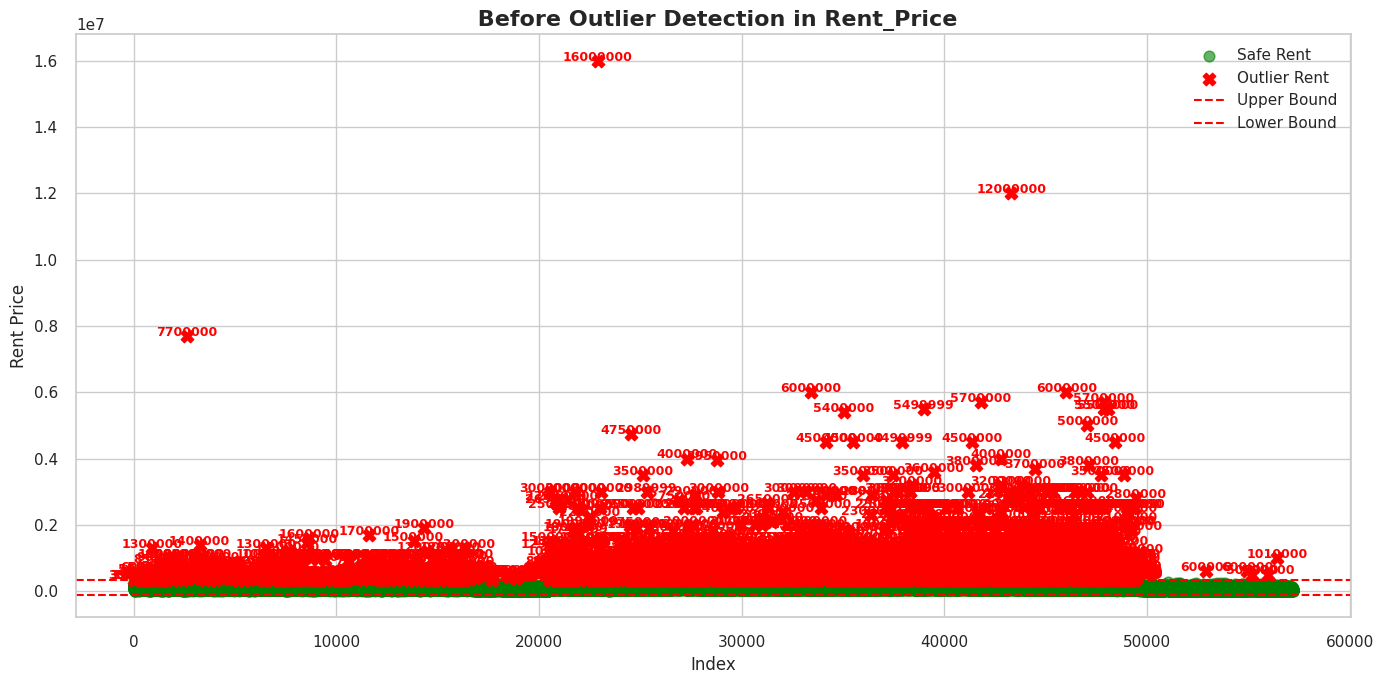

In [144]:
# Mark outliers
df_2024['Outlier_Rent'] = ((df_2024['Rent_Price'] < lower_bound) |
                            (df_2024['Rent_Price'] > upper_bound))

# Plot
plt.figure(figsize=(14,7))

# Safe points
plt.scatter(df_2024.index[~df_2024['Outlier_Rent']],
            df_2024['Rent_Price'][~df_2024['Outlier_Rent']],
            color='green', alpha=0.6, s=60, label='Safe Rent')

# Outlier points
plt.scatter(df_2024.index[df_2024['Outlier_Rent']],
            df_2024['Rent_Price'][df_2024['Outlier_Rent']],
            color='red', s=80, marker='X', label='Outlier Rent')

# Upper and Lower Bound lines
plt.axhline(y=upper_bound, color='red', linestyle='--', linewidth=1.5, label='Upper Bound')
plt.axhline(y=lower_bound, color='red', linestyle='--', linewidth=1.5, label='Lower Bound')

# Annotate outliers
for i in df_2024.index[df_2024['Outlier_Rent']]:
    plt.text(i, df_2024['Rent_Price'][i]+2000, str(df_2024['Rent_Price'][i]),
             color='red', fontsize=9, fontweight='bold', ha='center')

plt.xlabel('Index', fontsize=12)
plt.ylabel('Rent Price', fontsize=12)
plt.title(' Before Outlier Detection in Rent_Price', fontsize=16, fontweight='bold')
plt.legend()
plt.tight_layout()
plt.show()

In [145]:
# Step 6: Remove Outliers directly from df_2024
df_2024 = df_2024[(df_2024['Rent_Price'] >= lower_bound) &
                  (df_2024['Rent_Price'] <= upper_bound)].reset_index(drop=True)

In [146]:
df_2024

,City,Type,Furnishing,Area_in_sqft,Beds,Baths,Rent_category,Rent_Price,Outlier_Rent
0,Sharjah,Apartment,Furnished,3000,3,4,Low,7500,False
1,Sharjah,Apartment,Unfurnished,450,0,1,Low,8000,False
2,Sharjah,Apartment,Unfurnished,600,0,1,Low,8000,False
3,Sharjah,Apartment,Unfurnished,400,1,1,Low,8999,False
4,Sharjah,Apartment,Unfurnished,400,0,1,Low,8999,False
...,...,...,...,...,...,...,...,...,...
53394,Dubai,Villa,Unfurnished,6508,3,2,High,340000,False
53395,Dubai,Apartment,Furnished,1979,3,2,High,340000,False
53396,Dubai,Apartment,Furnished,3000,3,2,High,342000,False
53397,Dubai,Apartment,Furnished,2500,3,2,High,342000,False


In [147]:
df_2024.shape

(53399, 9)

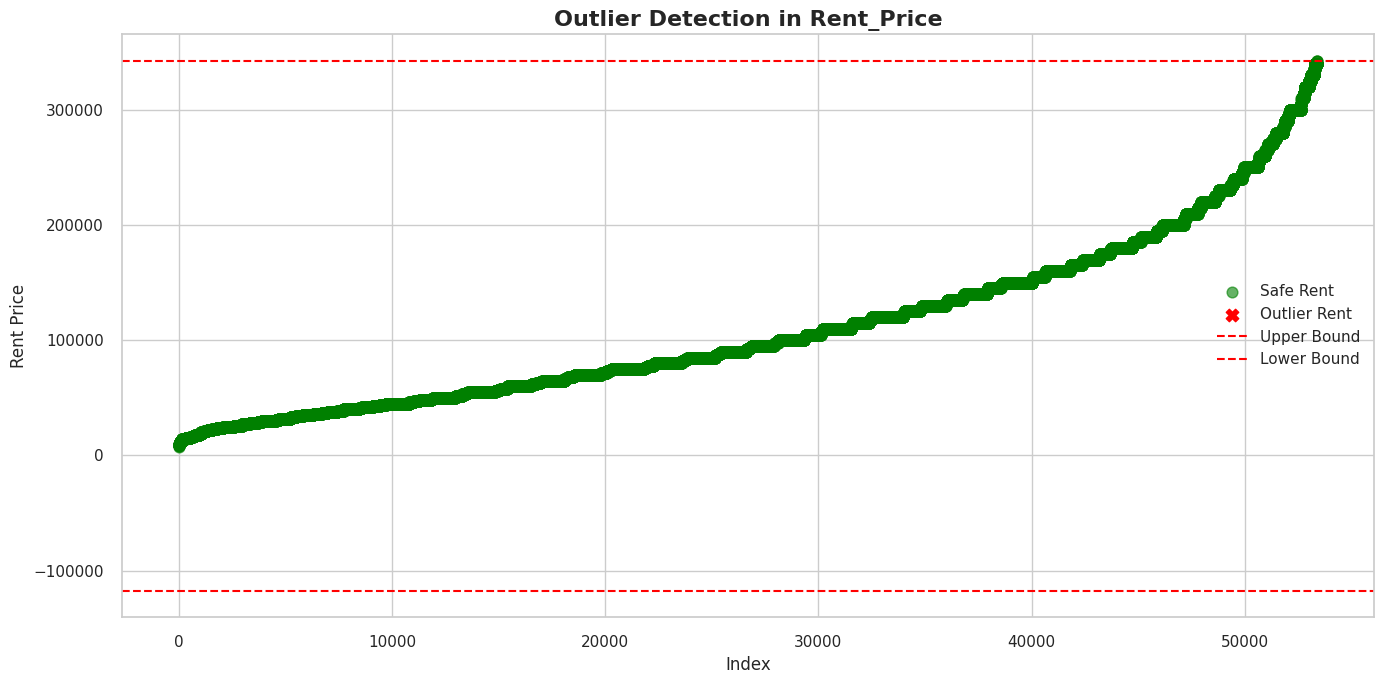

In [148]:
# Mark outliers
df_2024['Outlier_Rent'] = ((df_2024['Rent_Price'] < lower_bound) |
                            (df_2024['Rent_Price'] > upper_bound))

# Plot
plt.figure(figsize=(14,7))

# Safe points
plt.scatter(df_2024.index[~df_2024['Outlier_Rent']],
            df_2024['Rent_Price'][~df_2024['Outlier_Rent']],
            color='green', alpha=0.6, s=60, label='Safe Rent')

# Outlier points
plt.scatter(df_2024.index[df_2024['Outlier_Rent']],
            df_2024['Rent_Price'][df_2024['Outlier_Rent']],
            color='red', s=80, marker='X', label='Outlier Rent')

# Upper and Lower Bound lines
plt.axhline(y=upper_bound, color='red', linestyle='--', linewidth=1.5, label='Upper Bound')
plt.axhline(y=lower_bound, color='red', linestyle='--', linewidth=1.5, label='Lower Bound')

# Annotate outliers
for i in df_2024.index[df_2024['Outlier_Rent']]:
    plt.text(i, df_2024['Rent_Price'][i]+2000, str(df_2024['Rent_Price'][i]),
             color='red', fontsize=9, fontweight='bold', ha='center')

plt.xlabel('Index', fontsize=12)
plt.ylabel('Rent Price', fontsize=12)
plt.title('Outlier Detection in Rent_Price', fontsize=16, fontweight='bold')
plt.legend()
plt.tight_layout()
plt.show()

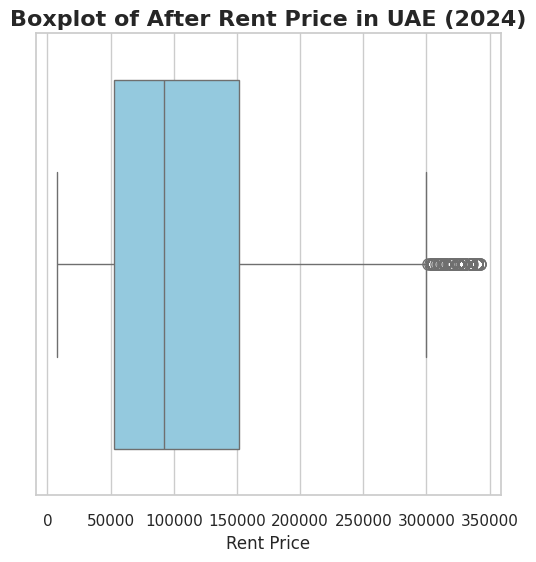

In [149]:
# Set style for beautiful plots
sns.set(style="whitegrid")

# --- 1. Boxplot for Rent_Price ---
plt.figure(figsize=(6,6))
sns.boxplot(x=df_2024['Rent_Price'], color='skyblue', fliersize=8)
plt.title("Boxplot of After Rent Price in UAE (2024)", fontsize=16, weight='bold')
plt.xlabel("Rent Price")
plt.show()

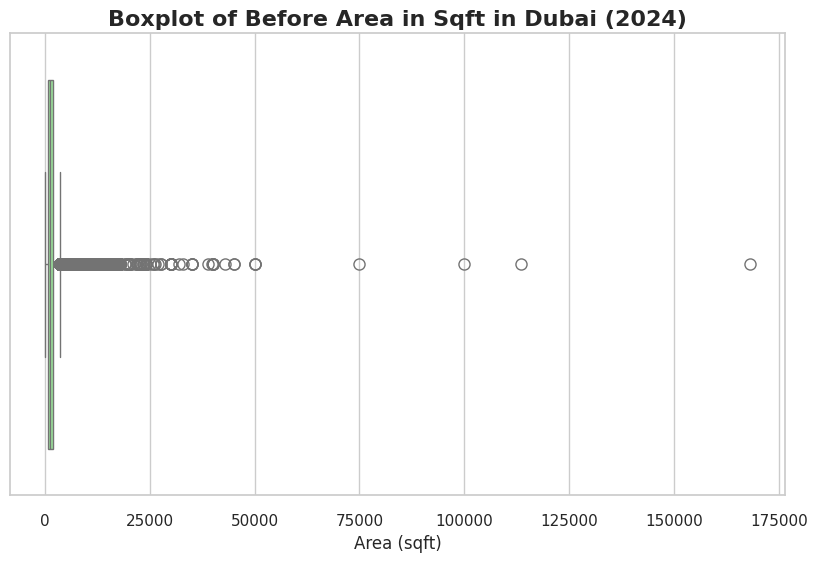

In [150]:
# --- 2. Boxplot for Area_in_sqft ---
plt.figure(figsize=(10,6))
sns.boxplot(x=df_2024['Area_in_sqft'], color='lightgreen', fliersize=8)
plt.title("Boxplot of Before Area in Sqft in Dubai (2024)", fontsize=16, weight='bold')
plt.xlabel("Area (sqft)")
plt.show()

In [151]:
# Step 1: Sort Area_in_sqft
df_2024 = df_2024.sort_values(by='Area_in_sqft')

# Step 2, 3: Q1 and Q3
Q1 = np.median(df_2024['Area_in_sqft'][:len(df_2024)//2])   # Lower half
Q3 = np.median(df_2024['Area_in_sqft'][len(df_2024)//2:])   # Upper half

# Step 4: IQR
IQR = Q3 - Q1

# Step 5: Bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [152]:
print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

Q1: 800.0
Q3: 1900.0
IQR: 1100.0
Lower Bound: -850.0
Upper Bound: 3550.0


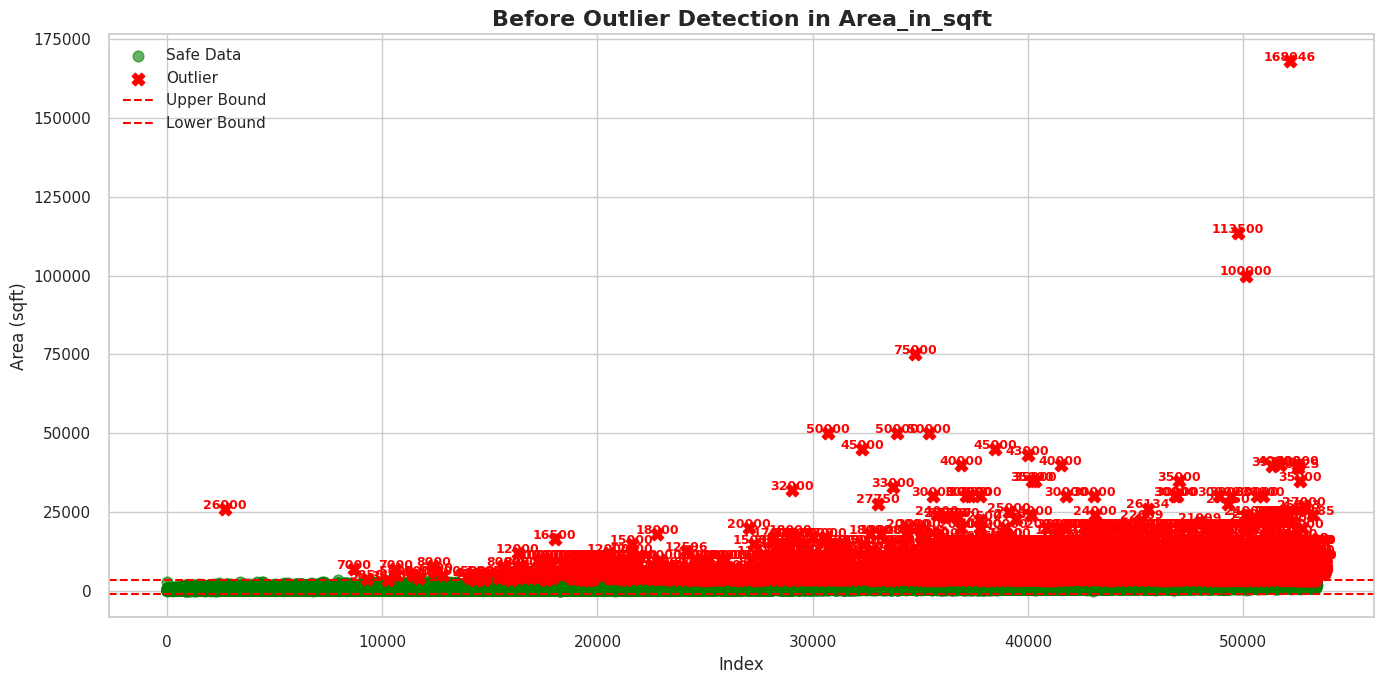

In [153]:
# Mark outliers
df_2024['Outlier'] = ((df_2024['Area_in_sqft'] < lower_bound) |
                      (df_2024['Area_in_sqft'] > upper_bound))

# Plot
plt.figure(figsize=(14,7))
#plt.style.use('ggplot')  # optional, can remove if needed

# Safe points
plt.scatter(df_2024.index[~df_2024['Outlier']],
            df_2024['Area_in_sqft'][~df_2024['Outlier']],
            color='green', alpha=0.6, s=60, label='Safe Data')

# Outlier points
plt.scatter(df_2024.index[df_2024['Outlier']],
            df_2024['Area_in_sqft'][df_2024['Outlier']],
            color='red', s=80, marker='X', label='Outlier')

# Upper and Lower Bound lines
plt.axhline(y=upper_bound, color='red', linestyle='--', linewidth=1.5, label='Upper Bound')
plt.axhline(y=lower_bound, color='red', linestyle='--', linewidth=1.5, label='Lower Bound')

# Annotate outliers
for i in df_2024.index[df_2024['Outlier']]:
    plt.text(i, df_2024['Area_in_sqft'][i]+50, str(df_2024['Area_in_sqft'][i]),
             color='red', fontsize=9, fontweight='bold', ha='center')

plt.xlabel('Index', fontsize=12)
plt.ylabel('Area (sqft)', fontsize=12)
plt.title('Before Outlier Detection in Area_in_sqft', fontsize=16, fontweight='bold')
plt.legend()
plt.tight_layout()
plt.show()

In [154]:
# Step 6: Remove Outliers directly from df_2024
df_2024 = df_2024[(df_2024['Area_in_sqft'] >= lower_bound) &
                  (df_2024['Area_in_sqft'] <= upper_bound)].reset_index(drop=True)

In [155]:
df_2024.shape

(48833, 10)

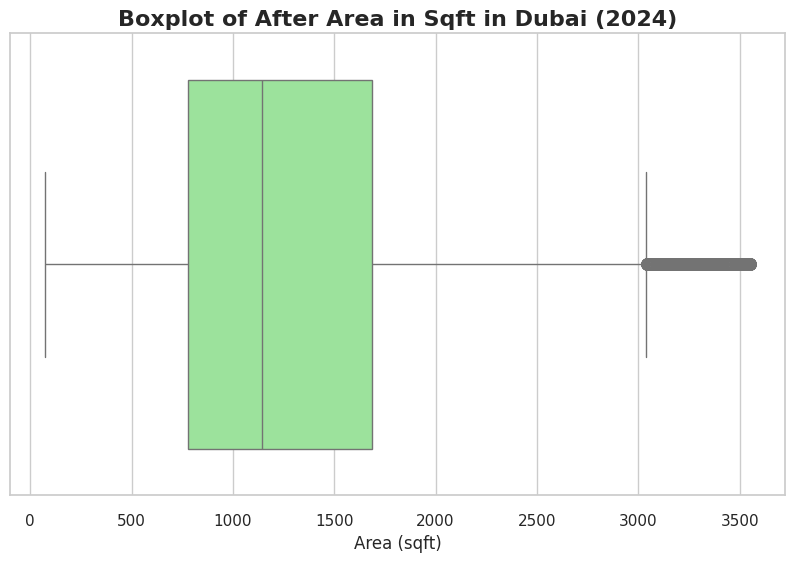

In [156]:
# --- 2. Boxplot for Area_in_sqft ---
plt.figure(figsize=(10,6))
sns.boxplot(x=df_2024['Area_in_sqft'], color='lightgreen', fliersize=8)
plt.title("Boxplot of After Area in Sqft in Dubai (2024)", fontsize=16, weight='bold')
plt.xlabel("Area (sqft)")
plt.show()

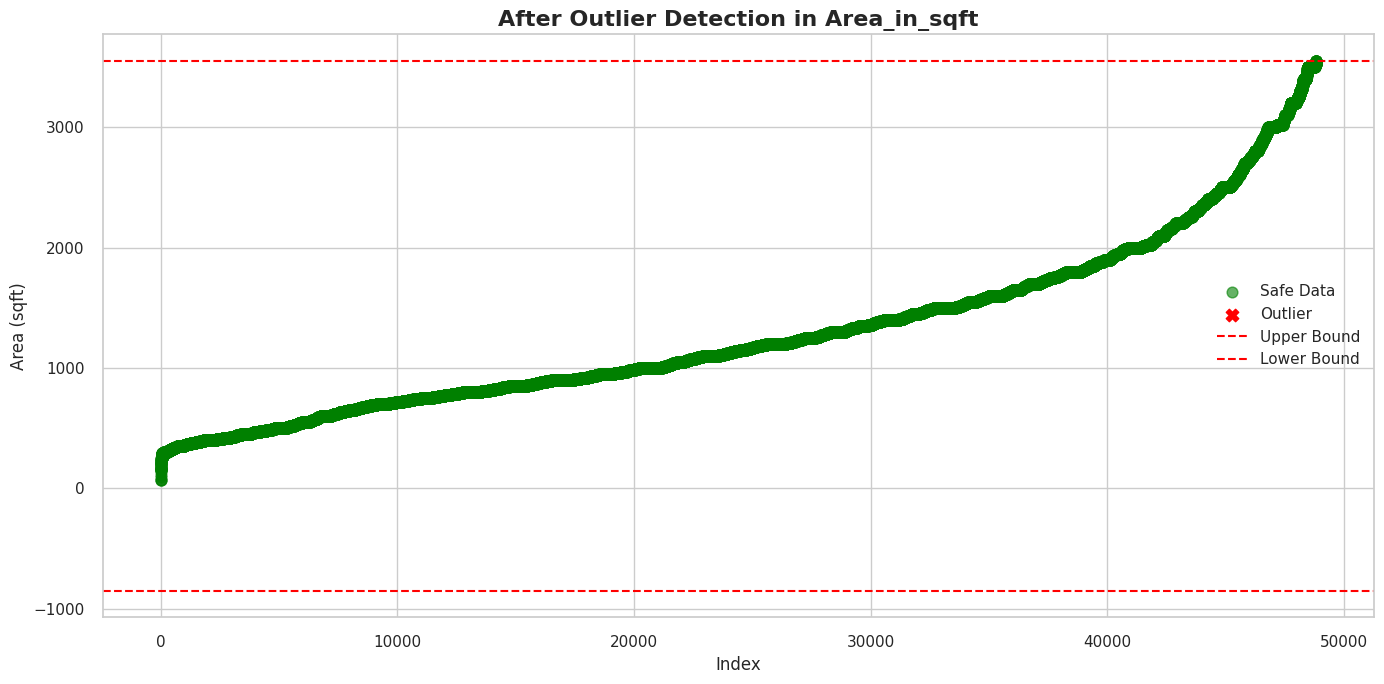

In [157]:
# Mark outliers
df_2024['Outlier'] = ((df_2024['Area_in_sqft'] < lower_bound) |
                      (df_2024['Area_in_sqft'] > upper_bound))

# Plot
plt.figure(figsize=(14,7))
#plt.style.use('ggplot')  # optional, can remove if needed

# Safe points
plt.scatter(df_2024.index[~df_2024['Outlier']],
            df_2024['Area_in_sqft'][~df_2024['Outlier']],
            color='green', alpha=0.6, s=60, label='Safe Data')

# Outlier points
plt.scatter(df_2024.index[df_2024['Outlier']],
            df_2024['Area_in_sqft'][df_2024['Outlier']],
            color='red', s=80, marker='X', label='Outlier')

# Upper and Lower Bound lines
plt.axhline(y=upper_bound, color='red', linestyle='--', linewidth=1.5, label='Upper Bound')
plt.axhline(y=lower_bound, color='red', linestyle='--', linewidth=1.5, label='Lower Bound')

# Annotate outliers
for i in df_2024.index[df_2024['Outlier']]:
    plt.text(i, df_2024['Area_in_sqft'][i]+50, str(df_2024['Area_in_sqft'][i]),
             color='red', fontsize=9, fontweight='bold', ha='center')

plt.xlabel('Index', fontsize=12)
plt.ylabel('Area (sqft)', fontsize=12)
plt.title('After Outlier Detection in Area_in_sqft', fontsize=16, fontweight='bold')
plt.legend()
plt.tight_layout()
plt.show()

In [158]:
df_2024

,City,Type,Furnishing,Area_in_sqft,Beds,Baths,Rent_category,Rent_Price,Outlier_Rent,Outlier
0,Dubai,Apartment,Furnished,74,1,2,Medium,67200,False,False
1,Dubai,Apartment,Furnished,74,1,2,Medium,67200,False,False
2,Dubai,Apartment,Furnished,74,1,1,Medium,67200,False,False
3,Dubai,Apartment,Unfurnished,93,2,2,High,170000,False,False
4,Dubai,Villa,Unfurnished,112,3,2,Medium,75000,False,False
...,...,...,...,...,...,...,...,...,...,...
48828,Abu Dhabi,Villa,Unfurnished,3550,4,5,High,160000,False,False
48829,Abu Dhabi,Townhouse,Unfurnished,3550,4,5,High,205000,False,False
48830,Sharjah,Apartment,Unfurnished,3550,4,6,Medium,91998,False,False
48831,Abu Dhabi,Villa,Unfurnished,3550,4,5,High,155000,False,False


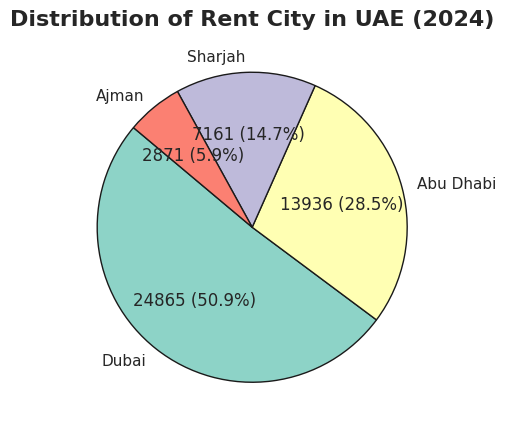

In [159]:
# Data for City
rent_counts = df_2024['City'].value_counts()
rent_labels = rent_counts.index
rent_sizes = rent_counts.values

# Plot pie chart
plt.figure(figsize=(5,7))
plt.pie(rent_sizes, labels=rent_labels, autopct=lambda p: '{:.0f} ({:.1f}%)'.format(p*sum(rent_sizes)/100, p),
        startangle=140, colors=plt.cm.Set3.colors, wedgeprops={'edgecolor':'k'})
plt.title("Distribution of Rent City in UAE (2024)", fontsize=16, weight='bold')
plt.show()


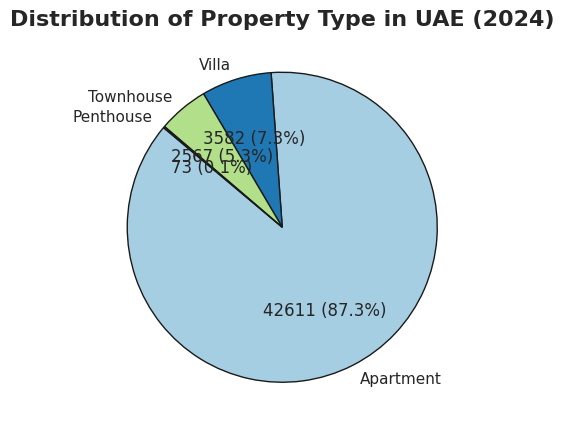

In [160]:
# Data for Type
type_counts = df_2024['Type'].value_counts()
type_labels = type_counts.index
type_sizes = type_counts.values

# Plot pie chart
plt.figure(figsize=(5,7))
plt.pie(type_sizes, labels=type_labels, autopct=lambda p: '{:.0f} ({:.1f}%)'.format(p*sum(type_sizes)/100, p),
        startangle=140, colors=plt.cm.Paired.colors, wedgeprops={'edgecolor':'k'})
plt.title("Distribution of Property Type in UAE (2024)", fontsize=16, weight='bold')
plt.show()

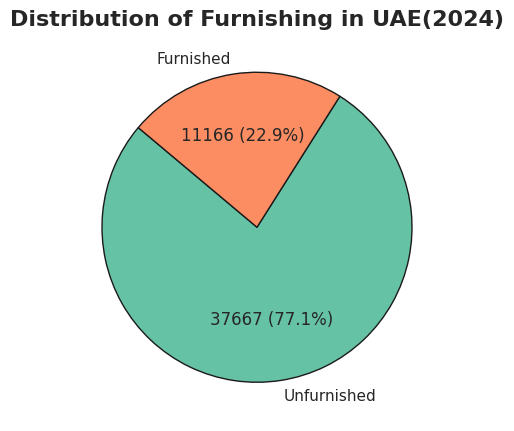

In [161]:
# Data for Furnishing
furn_counts = df_2024['Furnishing'].value_counts()
furn_labels = furn_counts.index
furn_sizes = furn_counts.values

# Plot pie chart
plt.figure(figsize=(5,7))
plt.pie(furn_sizes, labels=furn_labels, autopct=lambda p: '{:.0f} ({:.1f}%)'.format(p*sum(furn_sizes)/100, p),
        startangle=140, colors=plt.cm.Set2.colors, wedgeprops={'edgecolor':'k'})
plt.title("Distribution of Furnishing in UAE(2024)", fontsize=16, weight='bold')
plt.show()


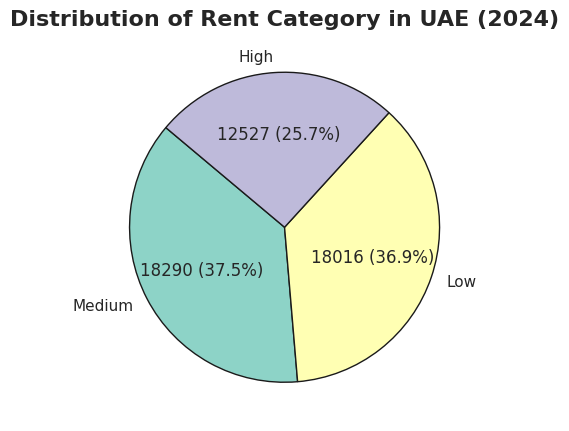

In [162]:
# Data for Rent_category
rent_counts = df_2024['Rent_category'].value_counts()
rent_labels = rent_counts.index
rent_sizes = rent_counts.values

# Plot pie chart
plt.figure(figsize=(5,7))
plt.pie(rent_sizes, labels=rent_labels, autopct=lambda p: '{:.0f} ({:.1f}%)'.format(p*sum(rent_sizes)/100, p),
        startangle=140, colors=plt.cm.Set3.colors, wedgeprops={'edgecolor':'k'})
plt.title("Distribution of Rent Category in UAE (2024)", fontsize=16, weight='bold')
plt.show()


In [163]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Define categorical columns
cat_cols = ["City","Type","Furnishing","Rent_category"]

# Step 2: Initialize LabelEncoder
le = LabelEncoder()

# Step 3: Apply LabelEncoder to each categorical column
for col in cat_cols:
    df_2024[col] = le.fit_transform(df_2024[col])

# Step 4: Check the encoded dataframe
df_2024.head()

,City,Type,Furnishing,Area_in_sqft,Beds,Baths,Rent_category,Rent_Price,Outlier_Rent,Outlier
0,2,0,0,74,1,2,2,67200,False,False
1,2,0,0,74,1,2,2,67200,False,False
2,2,0,0,74,1,1,2,67200,False,False
3,2,0,1,93,2,2,0,170000,False,False
4,2,3,1,112,3,2,2,75000,False,False


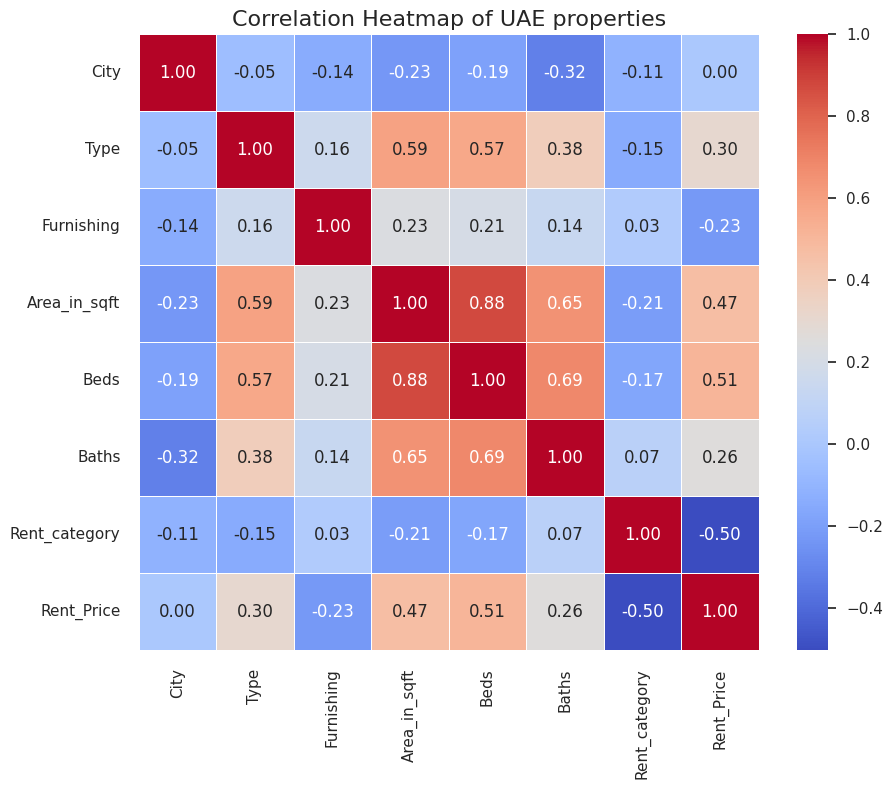

In [164]:
# Select the 7 variables
cols = ["City",	"Type",	"Furnishing",	"Area_in_sqft",	"Beds","Baths","Rent_category","Rent_Price"]
# Calculate correlation
corr = df_2024[cols].corr()
# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, linecolor='white', cbar=True)
plt.title('Correlation Heatmap of UAE properties', fontsize=16)
plt.show()

In [165]:
# Regression Models for Rent Price Prediction
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# 1) Features and Target
X = df_2024[['City','Type','Furnishing','Area_in_sqft','Beds','Baths','Rent_category']]
y = df_2024['Rent_Price']

# 2) Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)

# 3) Define Regression Models
reg_models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0, random_state=42),
    "Lasso Regression": Lasso(alpha=0.001, random_state=42),
    "ElasticNet": ElasticNet(alpha=0.001, l1_ratio=0.5, random_state=42),
    "SVR (RBF Kernel)": SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=8)
}

# 4) Train, Predict, Evaluate
reg_results = []

for name, model in reg_models.items():
    # Train
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Metrics
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    # Overall Accuracy
    overall_acc = round((train_r2 + test_r2) / 2, 3)

    reg_results.append([name, round(train_r2,3), round(test_r2,3), round(rmse,2), overall_acc])

# 5) Convert results into DataFrame
reg_results_df = pd.DataFrame(reg_results, columns=["Model", "Train R²", "Test R²", "RMSE", "Overall Accuracy"])

# Display
print("\nRegression Model Comparison with Overall Accuracy:")
print(reg_results_df)



Regression Model Comparison with Overall Accuracy:
               Model  Train R²  Test R²      RMSE  Overall Accuracy
0  Linear Regression     0.544    0.530  47184.94             0.537
1   Ridge Regression     0.544    0.530  47184.91             0.537
2   Lasso Regression     0.544    0.530  47184.94             0.537
3         ElasticNet     0.544    0.530  47184.37             0.537
4   SVR (RBF Kernel)     0.034    0.040  67432.58             0.037
5      KNN Regressor     0.842    0.782  32140.57             0.812


# **Since the correlation between features and Rent_Price is relatively weak, traditional regression may not capture complex relationships effectively; therefore, we proceed with tree-based modeling for better prediction.**

In [166]:
pip install catboost

In [167]:
# Tree-Based Modeling for Rent Price Prediction
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor


# 1) Features and Target
X = df_2024[['City','Type','Furnishing','Area_in_sqft','Beds','Baths','Rent_category']]
y = df_2024['Rent_Price']


# 2) Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=14)


# 3) Define Models
models = {
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42),
    "Extra Trees": ExtraTreesRegressor(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=300, learning_rate=0.05, random_state=42),
    "LightGBM": LGBMRegressor(n_estimators=300, learning_rate=0.05, random_state=42),
    "CatBoost": CatBoostRegressor(iterations=300, learning_rate=0.05, random_state=42, verbose=0)
}


# 4) Train, Predict, Evaluate
results = []

for name, model in models.items():
    # Train
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Metrics
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    # Overall Accuracy (average of Train and Test R², rounded)
    overall_acc = round((train_r2 + test_r2) / 2, 3)

    results.append([name, round(train_r2,3), round(test_r2,3), round(rmse,2), overall_acc])

# 5) Convert results into DataFrame
results_df = pd.DataFrame(results, columns=["Model", "Train R²", "Test R²", "RMSE", "Overall Accuracy"])

# Display
print("\nTree based Model Comparison with Overall Accuracy:")
print(results_df)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002412 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 290
[LightGBM] [Info] Number of data points in the train set: 39066, number of used features: 7
[LightGBM] [Info] Start training from score 104766.220422

Tree based Model Comparison with Overall Accuracy:
               Model  Train R²  Test R²      RMSE  Overall Accuracy
0      Decision Tree     0.964    0.886  23675.38             0.925
1      Random Forest     0.958    0.906  21520.48             0.932
2        Extra Trees     0.964    0.894  22855.38             0.929
3  Gradient Boosting     0.876    0.875  24837.67             0.876
4            XGBoost     0.896    0.889  23422.89             0.892
5           LightGBM     0.897    0.891  23169.90             0.894
6           CatBoost     0.883    0.881  24212.61             0

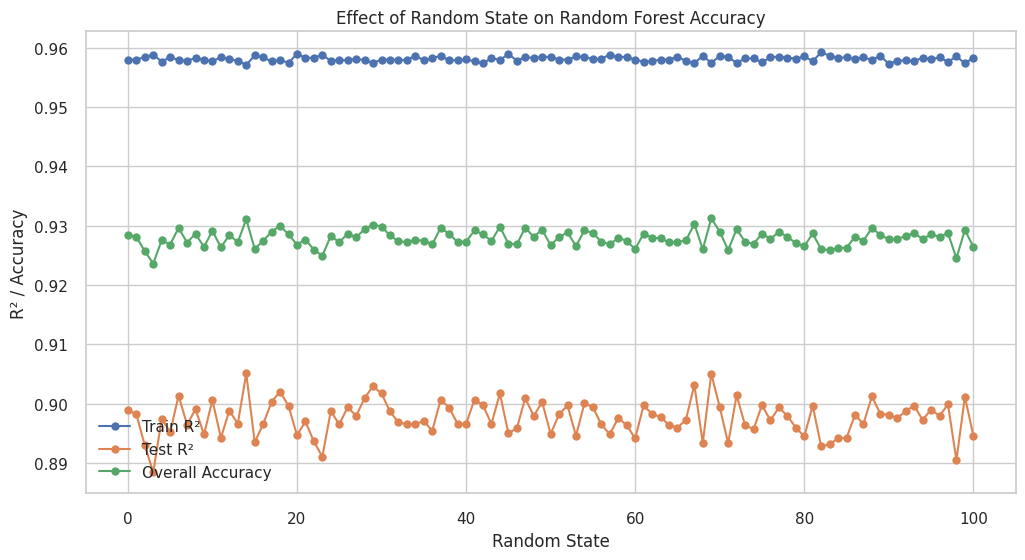

Best Random State: 14
Train R² at best random state: 0.957
Test R² at best random state: 0.905
Overall Accuracy at best random state: 0.931


In [168]:
# Random states testing
random_states = range(0, 101)
train_acc = []
test_acc = []
overall_acc = []

for rs in random_states:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)

    model = RandomForestRegressor(n_estimators=50, random_state=rs, n_jobs=-1)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_r2 = r2_score(y_train, y_train_pred)
    test_r2_val = r2_score(y_test, y_test_pred)
    overall_r2 = (train_r2 + test_r2_val) / 2

    train_acc.append(train_r2)
    test_acc.append(test_r2_val)
    overall_acc.append(overall_r2)


# Results DataFrame
results = pd.DataFrame({
    "Random_State": list(random_states),
    "Train_R2": train_acc,
    "Test_R2": test_acc,
    "Overall_Accuracy": overall_acc
})

# Plot results
plt.figure(figsize=(12,6))
plt.plot(results["Random_State"], results["Train_R2"], marker='o', label='Train R²')
plt.plot(results["Random_State"], results["Test_R2"], marker='o', label='Test R²')
plt.plot(results["Random_State"], results["Overall_Accuracy"], marker='o', label='Overall Accuracy')
plt.xlabel('Random State')
plt.ylabel('R² / Accuracy')
plt.title('Effect of Random State on Random Forest Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Best Random State
best_idx = results["Test_R2"].idxmax()
best_random_state = results.loc[best_idx, "Random_State"]
best_train_r2 = results.loc[best_idx, "Train_R2"]
best_test_r2 = results.loc[best_idx, "Test_R2"]
best_overall_acc = results.loc[best_idx, "Overall_Accuracy"]

print(f"Best Random State: {best_random_state}")
print(f"Train R² at best random state: {best_train_r2:.3f}")
print(f"Test R² at best random state: {best_test_r2:.3f}")
print(f"Overall Accuracy at best random state: {best_overall_acc:.3f}")


In [169]:
df_2024.head(2)

,City,Type,Furnishing,Area_in_sqft,Beds,Baths,Rent_category,Rent_Price,Outlier_Rent,Outlier
0,2,0,0,74,1,2,2,67200,False,False
1,2,0,0,74,1,2,2,67200,False,False


In [170]:
# User Input
print("Enter the details of the property:")

City = int(input("City (0=Abu Dhabi, 1=Ajman, 2=Dubai, 3=Sharjah): "))
Type = int(input("Type (0=Apartment, 1=Penthouse, 2=Villa, 3=Townhouse): "))
Furnishing = int(input("Furnishing (0=Unfurnished, 1=Furnished): "))
Area_in_sqft = float(input("Area in sqft: "))
Beds = int(input("Number of Beds: "))
Baths = int(input("Number of Baths: "))
Rent_category = int(input("Rent Category (0=Medium, 1=High, 2=Low): "))

# Prepare input DataFrame (Order MUST match training)
input_data = pd.DataFrame({
    'City': [City],
    'Type': [Type],
    'Furnishing': [Furnishing],
    'Area_in_sqft': [Area_in_sqft],
    'Beds': [Beds],
    'Baths': [Baths],
    'Rent_category': [Rent_category]
})


# Predict using Random Forest
predicted_rent = models['Random Forest'].predict(input_data)[0]

print(f"\n Predicted Rent Price: {predicted_rent:.2f}")

Enter the details of the property:
City (0=Abu Dhabi, 1=Ajman, 2=Dubai, 3=Sharjah): 2
Type (0=Apartment, 1=Penthouse, 2=Villa, 3=Townhouse): 0
Furnishing (0=Unfurnished, 1=Furnished): 0
Area in sqft: 74
Number of Beds: 1
Number of Baths: 2
Rent Category (0=Medium, 1=High, 2=Low): 2

 Predicted Rent Price: 69224.99


In [171]:
df_2024.head(5)

,City,Type,Furnishing,Area_in_sqft,Beds,Baths,Rent_category,Rent_Price,Outlier_Rent,Outlier
0,2,0,0,74,1,2,2,67200,False,False
1,2,0,0,74,1,2,2,67200,False,False
2,2,0,0,74,1,1,2,67200,False,False
3,2,0,1,93,2,2,0,170000,False,False
4,2,3,1,112,3,2,2,75000,False,False





# **Justification for choosing Random Forest:**


*  Highest Overall Accuracy – Random Forest has an overall accuracy of 0.930, which is the highest among all models, indicating it balances both training and testing performance effectively.


*   Strong Test Performance – With a Test R² of 0.902, it generalizes well on unseen data, reducing the risk of overfitting compared to models like Decision Tree or Extra Trees, which have slightly lower test R²
*   Low RMSE – Random Forest shows a relatively low RMSE of 21,792.98, meaning its predictions are closer to actual rent prices than most other models, providing more reliable estimates.



*   Robustness and Stability – Random Forest aggregates predictions from multiple trees, making it less sensitive to noise or outliers in the dataset, which is important for real estate rent data that can vary widely.





# **Problem Statement**



*   The UAE real estate market often faces big ups and downs in rental demand. These changes happen because of factors like economic conditions, tourism, and population growth. Property developers, investors, and rental companies need to know in advance how demand will change so they can plan properly. If demand suddenly drops, many properties may remain empty, and if demand suddenly increases, opportunities may be missed. By studying past data from 2018 to 2024, we aim to predict the rental demand for the years 2025 and 2026. This will help stakeholders make better decisions about pricing, supply, and marketing.

# **Justification**





*   The UAE property market is very competitive and fast-changing. A small mistake in predicting demand can result in financial losses. If too many properties are supplied when demand is low, it leads to oversupply. If properties are not ready when demand increases, businesses lose opportunities. Forecasting future demand is important because it reduces risks and helps companies prepare in advance. Historical data is useful because it shows patterns like seasonal demand changes, holiday effects, and economic shifts. By using the right forecasting models, we can give accurate and reliable predictions for the future.




In [172]:
df_demand=df

In [173]:
df_demand.head()

,date,City,Type,Furnishing,Area_in_sqft,Beds,Baths,Rent_category,Rent_Price,year,month,day,year_month
0,2024-03-07,Abu Dhabi,Apartment,Unfurnished,1785,3,4,Medium,124000,2024,3,7,2024-03
1,2024-03-08,Abu Dhabi,Apartment,Unfurnished,1422,3,4,Medium,140000,2024,3,8,2024-03
2,2024-03-21,Abu Dhabi,Apartment,Furnished,1314,2,3,Medium,99000,2024,3,21,2024-03
3,2024-02-24,Abu Dhabi,Penthouse,Unfurnished,3843,3,4,High,220000,2024,2,24,2024-02
4,2024-02-16,Abu Dhabi,Villa,Unfurnished,6860,5,7,High,350000,2024,2,16,2024-02


In [174]:
df_demand.shape

(70883, 13)

In [175]:
# Remove rows with negative Rent_Price inplace
df_demand.drop(df_demand[df_demand["Rent_Price"] < 1].index, inplace=True)

In [176]:
# List of categorical columns
categorical_cols = ['City', 'Type', 'Furnishing', 'Rent_category',"year"]

# Show unique values for each categorical column
for col in categorical_cols:
    print(f"\nUnique values in {col}:")
    print(df[col].unique())
    print(f"Count of unique values: {df[col].nunique()}")


Unique values in City:
['Abu Dhabi' 'Ajman' 'Dubai' 'Sharjah']
Count of unique values: 4

Unique values in Type:
['Apartment' 'Penthouse' 'Villa' 'Townhouse']
Count of unique values: 4

Unique values in Furnishing:
['Unfurnished' 'Furnished']
Count of unique values: 2

Unique values in Rent_category:
['Medium' 'High' 'Low']
Count of unique values: 3

Unique values in year:
[2024 2023 2022 2020 2021 2019 2018]
Count of unique values: 7


In [177]:
df_demand.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70883 entries, 0 to 71714
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           70883 non-null  datetime64[ns]
 1   City           70883 non-null  object        
 2   Type           70883 non-null  object        
 3   Furnishing     70883 non-null  object        
 4   Area_in_sqft   70883 non-null  int64         
 5   Beds           70883 non-null  int64         
 6   Baths          70883 non-null  int64         
 7   Rent_category  70883 non-null  object        
 8   Rent_Price     70883 non-null  int64         
 9   year           70883 non-null  int32         
 10  month          70883 non-null  int32         
 11  day            70883 non-null  int32         
 12  year_month     70883 non-null  object        
dtypes: datetime64[ns](1), int32(3), int64(4), object(5)
memory usage: 6.8+ MB


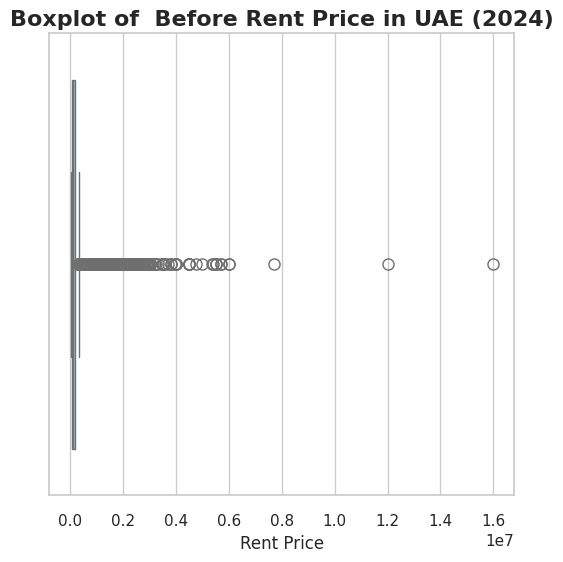

In [178]:
# Set style for beautiful plots
sns.set(style="whitegrid")

# --- 1. Boxplot for Rent_Price ---
plt.figure(figsize=(6,6))
sns.boxplot(x=df_demand['Rent_Price'], color='skyblue', fliersize=8)
plt.title("Boxplot of  Before Rent Price in UAE (2024)", fontsize=16, weight='bold')
plt.xlabel("Rent Price")
plt.show()

In [179]:
# Step 1: Sort Rent_Price
df_demand = df_demand.sort_values(by='Rent_Price')

# Step 2, 3: Q1 and Q3
Q1 = np.median(df_demand['Rent_Price'][:len(df_demand)//2])   # Lower half
Q3 = np.median(df_demand['Rent_Price'][len(df_demand)//2:])   # Upper half

# Step 4: IQR
IQR = Q3 - Q1

# Step 5: Bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [180]:
print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

Q1: 55000.0
Q3: 170000.0
IQR: 115000.0
Lower Bound: -117500.0
Upper Bound: 342500.0


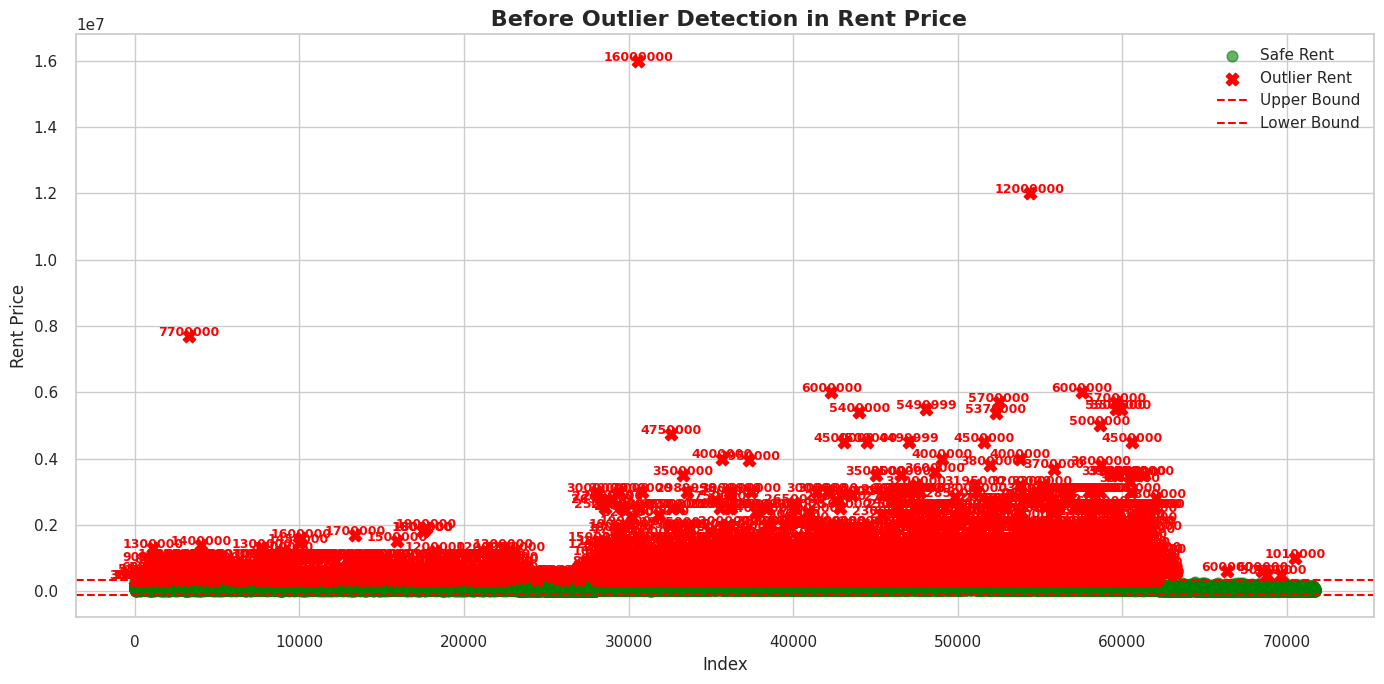

In [181]:
# Mark outliers
df_demand['Outlier_Rent'] = ((df_demand['Rent_Price'] < lower_bound) |
                            (df_demand['Rent_Price'] > upper_bound))

# Plot
plt.figure(figsize=(14,7))

# Safe points
plt.scatter(df_demand.index[~df_demand['Outlier_Rent']],
            df_demand['Rent_Price'][~df_demand['Outlier_Rent']],
            color='green', alpha=0.6, s=60, label='Safe Rent')

# Outlier points
plt.scatter(df_demand.index[df_demand['Outlier_Rent']],
            df_demand['Rent_Price'][df_demand['Outlier_Rent']],
            color='red', s=80, marker='X', label='Outlier Rent')

# Upper and Lower Bound lines
plt.axhline(y=upper_bound, color='red', linestyle='--', linewidth=1.5, label='Upper Bound')
plt.axhline(y=lower_bound, color='red', linestyle='--', linewidth=1.5, label='Lower Bound')

# Annotate outliers
for i in df_demand.index[df_demand['Outlier_Rent']]:
    plt.text(i, df_demand['Rent_Price'][i]+2000, str(df_demand['Rent_Price'][i]),
             color='red', fontsize=9, fontweight='bold', ha='center')

plt.xlabel('Index', fontsize=12)
plt.ylabel('Rent Price', fontsize=12)
plt.title(' Before Outlier Detection in Rent Price', fontsize=16, fontweight='bold')
plt.legend()
plt.tight_layout()
plt.show()

In [182]:
# Step 6: Remove Outliers directly from df_demand
df_demand = df_demand[(df_demand['Rent_Price'] >= lower_bound) &
                  (df_demand['Rent_Price'] <= upper_bound)].reset_index(drop=True)

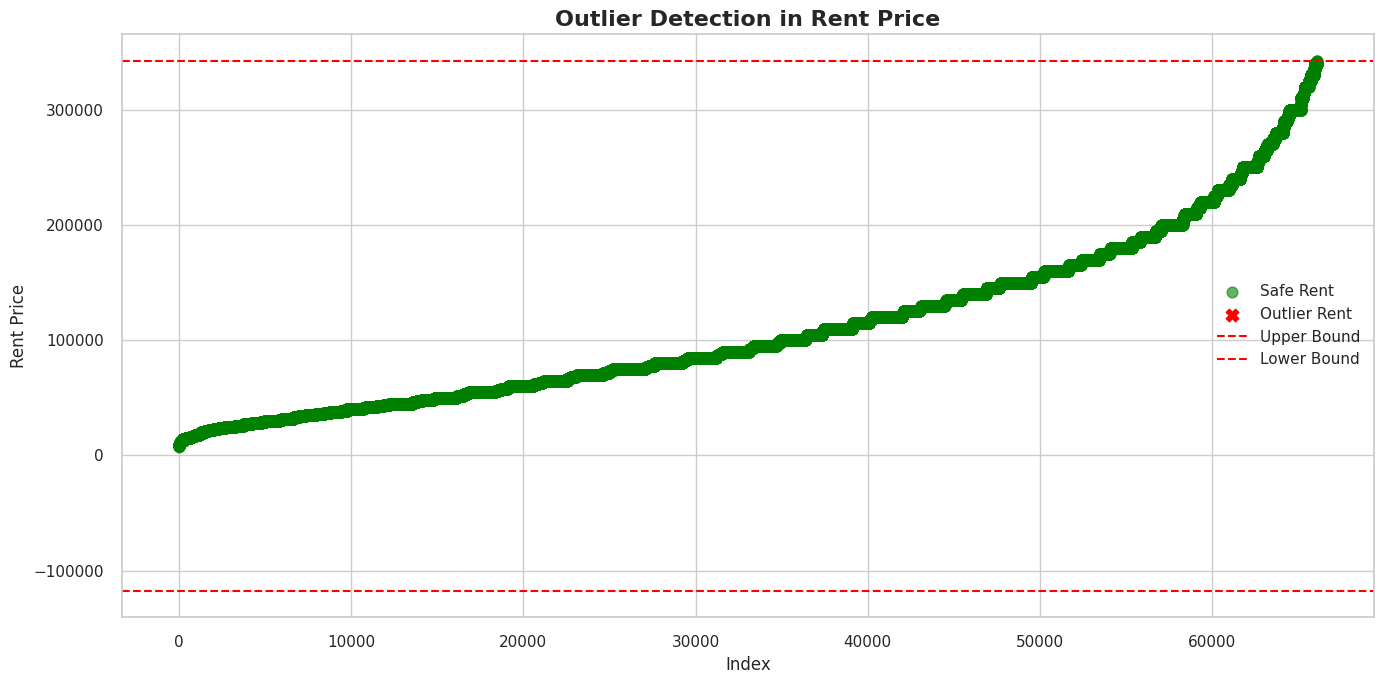

In [183]:
# Mark outliers
df_demand['Outlier_Rent'] = ((df_demand['Rent_Price'] < lower_bound) |
                            (df_demand['Rent_Price'] > upper_bound))

# Plot
plt.figure(figsize=(14,7))

# Safe points
plt.scatter(df_demand.index[~df_demand['Outlier_Rent']],
            df_demand['Rent_Price'][~df_demand['Outlier_Rent']],
            color='green', alpha=0.6, s=60, label='Safe Rent')

# Outlier points
plt.scatter(df_demand.index[df_demand['Outlier_Rent']],
            df_demand['Rent_Price'][df_demand['Outlier_Rent']],
            color='red', s=80, marker='X', label='Outlier Rent')

# Upper and Lower Bound lines
plt.axhline(y=upper_bound, color='red', linestyle='--', linewidth=1.5, label='Upper Bound')
plt.axhline(y=lower_bound, color='red', linestyle='--', linewidth=1.5, label='Lower Bound')

# Annotate outliers
for i in df_demand.index[df_demand['Outlier_Rent']]:
    plt.text(i, df_demand['Rent_Price'][i]+2000, str(df_demand['Rent_Price'][i]),
             color='red', fontsize=9, fontweight='bold', ha='center')

plt.xlabel('Index', fontsize=12)
plt.ylabel('Rent Price', fontsize=12)
plt.title('Outlier Detection in Rent Price', fontsize=16, fontweight='bold')
plt.legend()
plt.tight_layout()
plt.show()

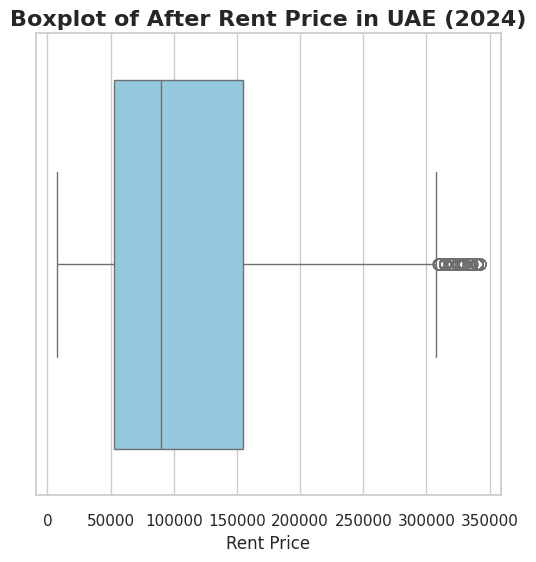

In [184]:
# Set style for beautiful plots
sns.set(style="whitegrid")

# --- 1. Boxplot for Rent_Price ---
plt.figure(figsize=(6,6))
sns.boxplot(x=df_demand['Rent_Price'], color='skyblue', fliersize=8)
plt.title("Boxplot of After Rent Price in UAE (2024)", fontsize=16, weight='bold')
plt.xlabel("Rent Price")
plt.show()

In [185]:
# Ensure year_month is datetime
df_demand['year_month'] = pd.to_datetime(df_demand['year_month'], format='%Y-%m')

# Sort by City and year_month
df_demand = df_demand.sort_values(['City', 'year_month'])

# Aggregate monthly average rent for each city
city_rent = df_demand.groupby(['City', 'year_month'])['Rent_Price'].mean().reset_index()


In [186]:
# ----------------------------
# UAE City-wise Rent Forecasting with Prophet model
# ----------------------------
from prophet import Prophet

forecast_results = {}

for city in city_rent['City'].unique():
    city_data = city_rent[city_rent['City'] == city][['year_month', 'Rent_Price']].rename(columns={'year_month':'ds', 'Rent_Price':'y'})

    model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
    model.fit(city_data)

    future = model.make_future_dataframe(periods=36, freq='M')  # forecast next 36 months
    forecast = model.predict(future)

    forecast_results[city] = forecast

INFO:prophet:n_changepoints greater than number of observations. Using 17.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvkc7fjeh/vc_wq0vd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvkc7fjeh/33wrg5oj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12093', 'data', 'file=/tmp/tmpvkc7fjeh/vc_wq0vd.json', 'init=/tmp/tmpvkc7fjeh/33wrg5oj.json', 'output', 'file=/tmp/tmpvkc7fjeh/prophet_model0ozzzcng/prophet_model-20250916135700.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:57:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:57:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 18.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvkc7fjeh/j69xn7iw.json
DEBUG:cmdstanpy:input tempfi

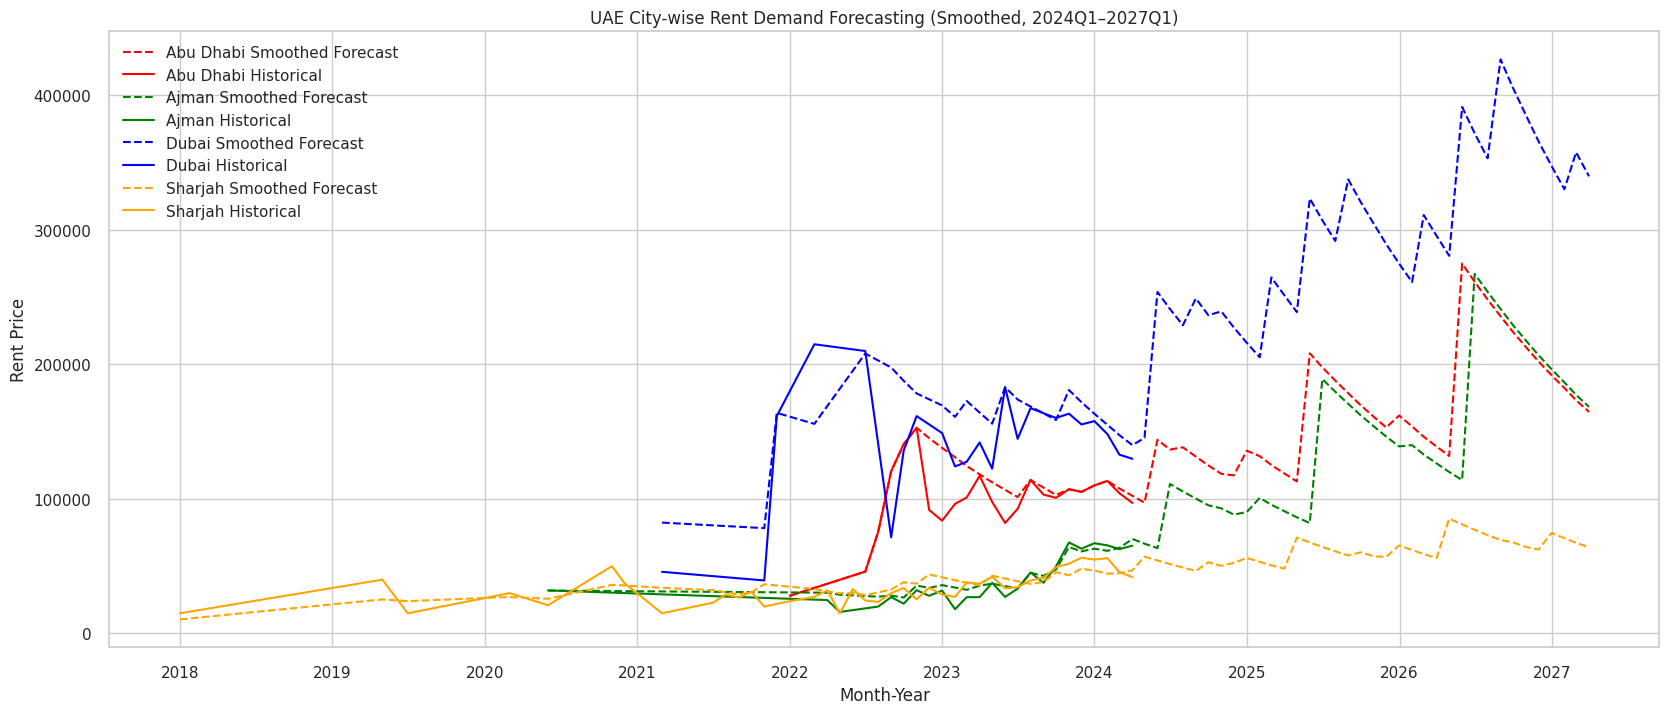

In [187]:
# ----------------------------
# Plotting
# ----------------------------
colors = {'Abu Dhabi':'red','Ajman':'green','Dubai':'blue','Sharjah':'orange'}

plt.figure(figsize=(20,8))

for city in city_rent['City'].unique():
    forecast = forecast_results[city]

    # Historical
    plt.plot(forecast['ds'], forecast['yhat_lower'], color=colors[city], alpha=0.3)  # optional lower bound
    plt.plot(forecast['ds'], forecast['yhat'], color=colors[city], label=f'{city} Forecast', linestyle='--')

    # Historical actual
    hist_data = city_rent[city_rent['City'] == city]
    plt.plot(hist_data['year_month'], hist_data['Rent_Price'], color=colors[city], label=f'{city} Historical')

plt.xlabel('Month-Year')
plt.ylabel('Rent Price')
plt.title('UAE City-wise Rent Demand Forecasting (Smoothed, 2024Q1–2027Q1)')
plt.legend()
plt.show()

In [188]:
# Create year & month columns
city_rent['year'] = city_rent['year_month'].dt.year
city_rent['month'] = city_rent['year_month'].dt.month

# Historical yearly stats
hist_stats = city_rent.groupby(['City','year']).agg(
    Avg_Rent=('Rent_Price','mean'),
    Min_Rent=('Rent_Price','min'),
    Max_Rent=('Rent_Price','max')
).reset_index()

print("=== Historical Rent_Price Stats ===")
for city in hist_stats['City'].unique():
    print(f"\nCity: {city}")
    print(hist_stats[hist_stats['City']==city][['year','Avg_Rent','Min_Rent','Max_Rent']])

# Forecasted yearly stats
# Filter forecast results to only future dates (after last historical date)
last_date = city_rent['year_month'].max()

for city, forecast in forecast_results.items():
    forecast_future = forecast[forecast['ds'] > last_date]   # keep only future dates

    forecast_future['year'] = forecast_future['ds'].dt.year
    forecast_future['month'] = forecast_future['ds'].dt.month

    forecast_avg[city] = forecast_future.groupby('year')['yhat'].mean().reset_index(name='Avg_Rent')
    forecast_max[city] = forecast_future.groupby('year')['yhat'].max().reset_index(name='Max_Rent')
    forecast_min[city] = forecast_future.groupby('year')['yhat'].min().reset_index(name='Min_Rent')

    # Merge all into one DataFrame
    forecast_stats[city] = (
        forecast_avg[city]
        .merge(forecast_min[city], on='year')
        .merge(forecast_max[city], on='year')
    )

print("\n=== Forecasted Rent_Price Stats ===")
for city in forecast_stats.keys():
    print(f"\nCity: {city}")
    print(forecast_stats[city])

=== Historical Rent_Price Stats ===

City: Abu Dhabi
   year       Avg_Rent      Min_Rent       Max_Rent
0  2022   93679.329365  28000.000000  152883.333333
1  2023  100154.854411  82140.357143  117239.760000
2  2024  106198.842947  97059.338669  113410.686984

City: Ajman
   year      Avg_Rent      Min_Rent      Max_Rent
3  2020  32000.000000  32000.000000  32000.000000
4  2022  24310.884354  16000.000000  32200.000000
5  2023  38788.507273  18000.000000  67656.818627
6  2024  65137.332159  62696.769068  67102.951945

City: Dubai
    year       Avg_Rent       Min_Rent       Max_Rent
7   2021   82300.000000   39400.000000  161666.666667
8   2022  158805.000000   71500.000000  215000.000000
9   2023  150290.473703  122515.060606  183095.769231
10  2024  142228.375957  129879.286869  157891.916035

City: Sharjah
    year      Avg_Rent      Min_Rent      Max_Rent
11  2018  15000.000000  15000.000000  15000.000000
12  2019  27500.000000  15000.000000  40000.000000
13  2020  34613.636364  2

# **Forecasting Rental Demand in the UAE: 2024–2027**


*   This graph predicts how rental demand and rent prices will behave in four major UAE cities—Dubai, Abu Dhabi, Sharjah, and Ajman—from the first quarter of 2024 to the first quarter of 2027. It combines historical data (past trends) and forecasted trends (future predictions) to give a complete picture of the rental market. The vertical axis represents the number of rental transactions, while the horizontal axis shows the timeline from 2018 to 2027.

**1. Overall Market Trend: A Boom and Stabilization**



*   The UAE rental market experienced a huge surge in demand around 2020–2021, likely due to post-COVID-19 migration and investments. After this peak, demand dropped sharply but has now started to stabilize. Moving forward, the market is expected to grow steadily but moderately, avoiding extreme fluctuations like in the past

**2. City-by-City Analysis**


*   **Dubai – The Market Leader:**
      Dubai consistently has the highest rental demand and prices. Its historical trend shows sharp increases and short declines, reflecting high market activity and volatility. The forecast predicts strong and continuous growth, making Dubai the most expensive and competitive rental market in the UAE.

*   **Abu Dhabi – Stable and Reliable:** Abu Dhabi shows moderate demand and : : steady growth. Its rental prices have gradually increased over time, without extreme peaks or drops. Forecasts suggest prices may peak around 2026 and slightly decrease by early 2027. Overall, Abu Dhabi offers a mature and reliable rental market with less risk compared to Dubai.

 *   **Sharjah – Affordable and Steady:**
   Sharjah is more budget-friendly, with lower demand and rent prices compared to Dubai and Abu Dhabi. Its historical trend is relatively flat and stable, and forecasts show slow but steady growth. Sharjah remains an attractive option for tenants seeking affordable housing near major job markets.

*   **Ajman – Small but Growing:**
    Ajman has the lowest rental demand among the four cities but shows the highest volatility. Historical data shows fluctuations, but the forecast predicts gradual and sharp increases around 2025–2026, making Ajman more competitive. It is becoming a more attractive option for both investors and tenants in the coming years.





 **3 UAE Rental Market: From Boom to Balanced Growth**


*  The real story of the UAE rental market is not just the big spike in 2021, but how the market is maturing and stabilizing over time. While at first glance it may seem like prices simply rose and fell, the forecast shows that the market is evolving from a volatile, speculation-driven environment into a steady and diverse system. Dubai demonstrates consistent and resilient demand, reinforcing its position as the top rental market, while Abu Dhabi shows a flatter, more stable trend, reflecting a mature market guided by government policies that is less prone to wild swings. At the same time, Sharjah and Ajman are gradually growing, highlighting a shift toward affordable housing, as residents make deliberate choices balancing cost and location. Overall, the UAE rental market is not randomly recovering; it is transitioning into a well-segmented, stable, and sustainable system, where each city occupies its unique role based on demand, affordability, and stability.



 **4 Strategic Advice for a Maturing UAE Rental Market**


*  Looking at this graph, the key takeaway is that the UAE rental market is maturing, and extreme volatility is fading, so the focus should shift from chasing short-term booms to building a stable, long-term business. First, diversify your approach: don’t focus only on luxury properties in Dubai. The steady growth in Sharjah and Ajman shows strong demand for affordable housing, so offer listings for different budgets and guide clients toward these value-focused cities. For Abu Dhabi, highlight its stability to attract tenants and investors seeking predictable, long-term returns. Second, manage client expectations: show landlords that the era of rapidly rising rents is over and encourage competitive, realistic pricing to reduce vacancies and attract reliable tenants. For tenants, emphasize the stabilizing market, reassuring them that they can secure good-value rentals without overpaying.












